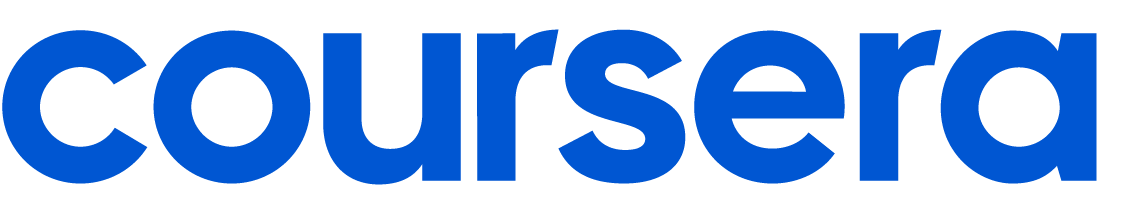

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages
!pip install --upgrade pip

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,make_scorer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import 

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

     |████████████████████████████████| 2.1 MB 17.7 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1


In [3]:
# Import any other packages you may want to use
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Basic Analysis
    Here we ask basic analitical questions about dataset
    Wanna know about the Dimensions, datatypes, wheather have null values, Descriptions about data, Skweness and Distributions, Outliers

In [6]:
# Dimensions of the training data

train_df.shape

(243787, 21)

In [7]:
# Sample of the training data

train_df.sample(5)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
48738,40,16.326184,653.047346,Standard,Mailed check,Yes,TV Shows,No,Computer,6.692989,15.400326,17,Comedy,4.657021,0,Male,19,Yes,Yes,6R97LPO5J6,1
170534,70,5.979013,418.530887,Standard,Electronic check,Yes,Both,No,TV,22.175855,136.082724,39,Fantasy,2.390414,7,Female,16,No,Yes,4UVFHXIPNH,0
241334,111,6.579054,730.275038,Standard,Mailed check,Yes,Both,No,TV,7.667434,104.089465,5,Sci-Fi,3.446338,7,Male,22,No,Yes,IJJUN5C7YX,1
7245,91,10.056709,915.160534,Basic,Bank transfer,Yes,Movies,No,Mobile,37.771001,38.571035,35,Action,2.745667,3,Female,23,Yes,No,YYW9Z5HFPB,0
121586,30,10.856406,325.692186,Premium,Bank transfer,No,TV Shows,No,TV,13.054968,60.810274,28,Fantasy,3.408281,7,Male,16,No,Yes,JGNHA21DYT,0


In [8]:
# Datatype of the training data

train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [9]:
# Memory consumed by the training data

train_df.memory_usage(deep=True)

Index                            128
AccountAge                   1950296
MonthlyCharges               1950296
TotalCharges                 1950296
SubscriptionType            15522188
PaymentMethod               17066428
PaperlessBilling            14505240
ContentType                 15357397
MultiDeviceAccess           14505185
DeviceRegistered            15238543
ViewingHoursPerWeek          1950296
AverageViewingDuration       1950296
ContentDownloadsPerMonth     1950296
GenrePreference             15358792
UserRating                   1950296
SupportTicketsPerMonth       1950296
Gender                      15114867
WatchlistSize                1950296
ParentalControl             14505518
SubtitlesEnabled            14505613
CustomerID                  16333729
Churn                        1950296
dtype: int64

In [10]:
# Null values in the training data

train_df.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [11]:
# Mathatically representation of the training data

train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


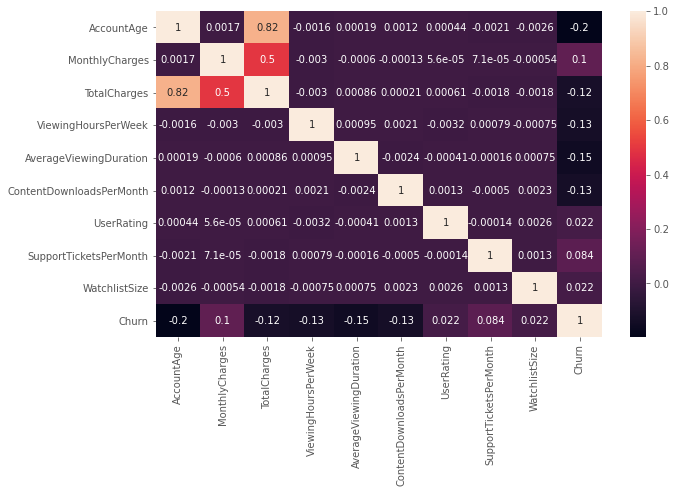

In [12]:
# Correlation of features in the training data

plt.figure(figsize=(10, 6))  
sns.heatmap(train_df.corr(),annot=True)
plt.show()

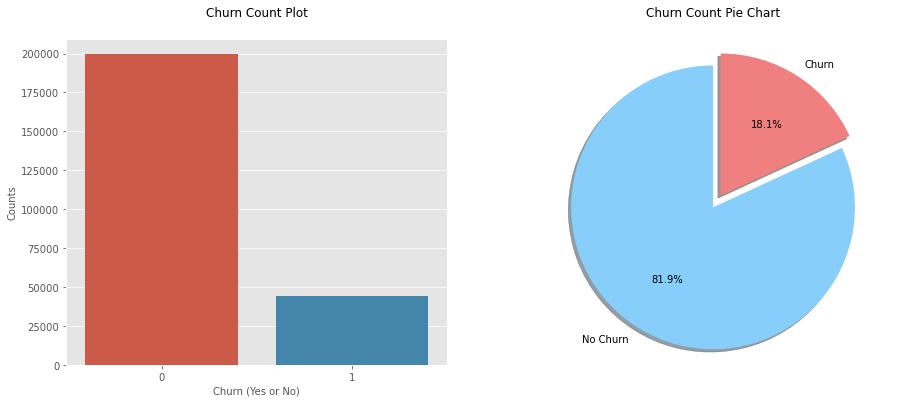

In [13]:
# Sample data (replace with your own data)
churn_counts = train_df['Churn'].value_counts()

# Create a Matplotlib figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot count for Churn (Yes) customers
sns.countplot(train_df['Churn'], ax=ax[0])

# Set plot labels and title for the first subplot
ax[0].set_xlabel('Churn (Yes or No)', fontsize=10)
ax[0].set_ylabel('Counts', fontsize=10)
ax[0].set_title('Churn Count Plot', y=1.05, fontsize=12)

# Create a pie chart for Churn counts
labels = ['No Churn', 'Churn']
sizes = churn_counts.values
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1)  # Explode the 'Churn' slice

ax[1].pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)

# Set title for the pie chart
ax[1].set_title('Churn Count Pie Chart', y=1.05, fontsize=12)

# Set aspect ratio to be equal, ensuring that the pie is drawn as a circle
ax[1].axis('equal')

# Show the plot
plt.show()


<details>
<summary><b><h3> ** Basic Analysis Insights (Click Here) ** <h3/></b></summary>

After conducting a preliminary analysis on the training dataset, we have gathered the following key insights:

#### Dataset Dimensions

- The training dataset has a total of 243,787 rows and 21 columns. This means we are working with a dataset that contains information for 243,787 instances across 21 different features.

#### Data Types

- The dataset consists of a mix of data types, including integers, objects (likely representing categorical data), and floating-point numbers. This variety in data types suggests the need for data preprocessing to ensure consistency and suitability for analysis.

#### Missing Values

- Upon initial examination, no missing values were detected in the dataset. However, it is advisable to conduct a more thorough investigation to confirm the absence of any hidden or masked missing values that may not be explicitly labeled as "NaN" or "null."

#### Distribution of Features

- Most of the features in the dataset appear to follow roughly normal distributions. This can be an essential observation for various statistical and machine learning methods that assume data normality.

#### Outliers

- Some of the features exhibit outliers. Identifying and understanding the nature of these outliers is crucial, as they can impact the performance of certain machine learning algorithms and statistical analyses. Further investigation is required to determine the cause and significance of these outliers.

#### Multicollinearity

- Multicollinearity is observed among the dataset's features. Multicollinearity occurs when two or more independent variables are highly correlated, which can lead to unstable coefficient estimates in regression models. Addressing multicollinearity may be necessary during the feature selection or model building phases.

#### Imbalanced Target

- Only 18% of customers exhibit Churn behavior, which can lead to biased model predictions.

These insights provide a valuable starting point for our data analysis and preprocessing tasks, highlighting areas that require attention and further investigation. It is essential to delve deeper into the data to gain a more comprehensive understanding and prepare the dataset for subsequent analysis and modeling.
</details>


## Optimizing Dataset Memory Usage

In this section, we'll optimize the memory usage of our dataset by converting the data types of certain features. By changing the data types, we can reduce the memory footprint of the dataset without losing any essential information.

### Data Type Ranges

Here are the common data type ranges for integers and floating-point numbers:

#### Integer Data Types

- `int8`: Range from -128 to 127
- `int16`: Range from -32,768 to 32,767
- `int32`: Range from -2,147,483,648 to 2,147,483,647
- `int64`: Range from -9,223,372,036,854,775,808 to 9,223,372,036,854,775,807

#### Floating-Point Data Types

- `float16`: Precision of approximately 3 decimal places, with a range suitable for small values.
- `float32`: Precision of approximately 7 decimal places, with a wide range for most applications.
- `float64` (or `float`): Precision of approximately 15 decimal places, with a very wide range and high accuracy.

When selecting data types for your variables, consider the trade-off between memory usage and the required range/precision. Choosing the appropriate data type can help optimize memory and improve the performance of your data analysis and modeling tasks.


### Integer and Float Features

Let's start by examining the minimum and maximum values of specific integer and float features in our dataset:

- **AccountAge Min & Max**: 1 and 119
- **MonthlyCharges Min & Max**: 4.990061546582933 and 19.989956867323198
- **ViewingHoursPerWeek Min & Max**: 1.000065389097874 and 39.99972313614872
- **AverageViewingDuration Min & Max**: 5.0005474861951456 and 179.99927511771546
- **ContentDownloadsPerMonth Min & Max**: 0 and 49
- **SupportTicketsPerMonth Min & Max**: 0 and 9
- **WatchlistSize Min & Max**: 0 and 24

We can see that these features have a limited range of values.

Next, let's examine some categorical features and their value counts:

- **GenrePreference**:
  - Comedy: 49060
  - Fantasy: 48955
  - Drama: 48744
  - Action: 48690
  - Sci-Fi: 48338

- **PaymentMethod**:
  - Electronic check: 61313
  - Credit card: 60924
  - Bank transfer: 60797
  - Mailed check: 60753

- **DeviceRegistered**:
  - Computer: 61147
  - Tablet: 61143
  - Mobile: 60914
  - TV: 60583

- **SubscriptionType**:
  - Standard: 81920
  - Basic: 81050
  - Premium: 80817

- **ContentType**:
  - Both: 81737
  - TV Shows: 81145
  - Movies: 80905


Before Optimized dataset size was `178.8 MB` & After optimized dataset size was `94.9 MB`.
By converting these categorical features to the 'category' data type, we can further optimize memory usage by `48%`.

Now, let's perform the type conversion and memory optimization:



In [14]:
train_df = train_df.astype({'SubscriptionType': 'category',
                                'ContentType':'category',
                                'DeviceRegistered':'category',
                                'PaymentMethod':'category',
                                'DeviceRegistered':'category',
                                'GenrePreference':'category',
                                'SupportTicketsPerMonth':'int8',
                                'WatchlistSize':'int8',
                                'AccountAge':'int16',
                                'ContentDownloadsPerMonth':'int16',
                                'MonthlyCharges':'float16',
                                'ViewingHoursPerWeek':'float16',
                                'AverageViewingDuration':'float16',
                                'UserRating':'float16',
                                'Churn':'int8'
                               }).drop('CustomerID',axis=1)

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

<details>
<summary><strong><h3>** Business Goal: Predicting Customer Churn (Click Here) **</h3></strong></summary>

The primary business goal is to predict customer churn. We aim to answer the following questions:

- Are there any key features that exhibit patterns related to customer churn or non-churn?
- Can we identify customer segments based on their behavioral patterns using data analysis?

<details>
<summary><strong>Approach 1: Know about the features and its qualities (Distribution,Ouliers)</strong></summary>

    - Univariant Analysis of Feature
    - Multivariant Analysis of Features  
    
</details>    
<details>
<summary><strong>Approach 2: Analyzing Customer Churn based on Account Age (To answer one question Account Age is relevant feature to predict churn customers or not?)</strong></summary>

Why We Focus on Account Age?

The end goal is to find or predict whether a customer will churn or not. However, it's crucial to identify the factors that lead to a customer leaving a service. In my opinion, account age is an important factor to consider. Here's why:

- **Early Churn Analysis:** By focusing on customers who left the service shortly after account creation, we can try to understand why they churned and find relevant aspects that contributed to their decision to leave. This allows us to take preventive measures for future customers.

- **Long-Term Churn Analysis:** On the other hand, analyzing customers who left the service after a long time can help us identify patterns in their behavior. Understanding why long-term customers churn is equally important in improving retention strategies.

In summary, account age is a critical factor because it provides insights into both early and long-term customer churn, enabling us to address the relevant aspects and improve customer retention.


<details>
<summary><strong>Analyzing Customers with Minimum Account Age</strong></summary>

**Steps:**

1. Create a function to balance the dataset by selecting churn customers with the minimum account age.
2. Explore various visualizations to identify patterns and behaviors within the filtered data.

</details>

<details>
<summary><strong>Analyzing Customers with Maximum Account Age</strong></summary>

**Steps:**

1. Create a function to balance the dataset by selecting churn customers with the maximum account age.
2. Explore various visualizations to uncover different patterns and behaviors within the filtered data.

</details>

This first approach allows us to gain insights into customer churn based on their Account Age and helps us identify potential patterns and behaviors that may impact churn decisions.

</details>
</details>


### Approach 1: Know about the features and its qualities (Distribution,Ouliers)

In [15]:
# When analysing data its important to know about features and its data type help 
# us to know which plot or process we can use to handle that feature.

train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   AccountAge                243787 non-null  int16   
 1   MonthlyCharges            243787 non-null  float16 
 2   TotalCharges              243787 non-null  float64 
 3   SubscriptionType          243787 non-null  category
 4   PaymentMethod             243787 non-null  category
 5   PaperlessBilling          243787 non-null  object  
 6   ContentType               243787 non-null  category
 7   MultiDeviceAccess         243787 non-null  object  
 8   DeviceRegistered          243787 non-null  category
 9   ViewingHoursPerWeek       243787 non-null  float16 
 10  AverageViewingDuration    243787 non-null  float16 
 11  ContentDownloadsPerMonth  243787 non-null  int16   
 12  GenrePreference           243787 non-null  category
 13  UserRating                243

In [16]:
def ShowNumericalFeaturesProperties(data, feature):
    """
    Show properties of a numerical feature in a dataset.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - feature (str): The name of the numerical feature to analyze.

    Displays a set of visualizations and statistical properties for the specified feature, including:
    1. Distribution plot with mean, median, and standard deviation lines.
    2. Box plot for visualizing the feature's distribution.
    3. QQ plot to check for normality.

    Args:
        data (DataFrame): The dataset containing the feature.
        feature (str): The name of the feature to analyze.
    """
    
    # Create a 2x2 grid of subplots for visualizations
    fig, ax = plt.subplots(2, 2, figsize=(15, 12))

    # Set the main title for the subplots
    fig.suptitle(f'{feature} Properties')

    # Subplot 1: Distribution Plot
    ax[0][0].set_title('Distribution Plot')
    sns.distplot(data[feature], hist=True, kde=True, ax=ax[0][0])

    # Add vertical lines for mean, median, and standard deviation
    ax[0][0].axvline(data[feature].mean(), color='olive', linestyle='--', label=f"Mean {np.round(data[feature].mean(), 2)}")
    ax[0][0].axvline(data[feature].median(), color='sienna', linestyle='-.', label=f"Median {np.round(data[feature].median(), 2)}")
    ax[0][0].axvline(data[feature].std(), color='coral', linestyle=':', label=f"Std {np.round(data[feature].std(), 2)}")

    ax[0][0].set_xlabel(feature)
    ax[0][0].set_ylabel('Frequency')

    # Subplot 2: Box Plot
    ax[0][1].set_title('Box Plot')
    ax[0][1].boxplot(data[feature])
    ax[0][1].set_xlabel(feature)

    # Subplot 3: QQ Plot
    ax[1][0].set_title('QQ Plot')
    stats.probplot(data[feature], dist="norm", plot=ax[1][0])

    # Create a legend in the lower right corner
    fig.legend(loc='upper right')

    # Turn off the last subplot (empty)
    ax[1, 1].set_axis_off()

    # Display the entire figure with subplots
    plt.show()


In [17]:
NumericFeatures = [feature for feature in train_df.columns if train_df[feature].dtype in ['int16', 'float64', 'float16', 'int8'] and feature != 'Churn'] 

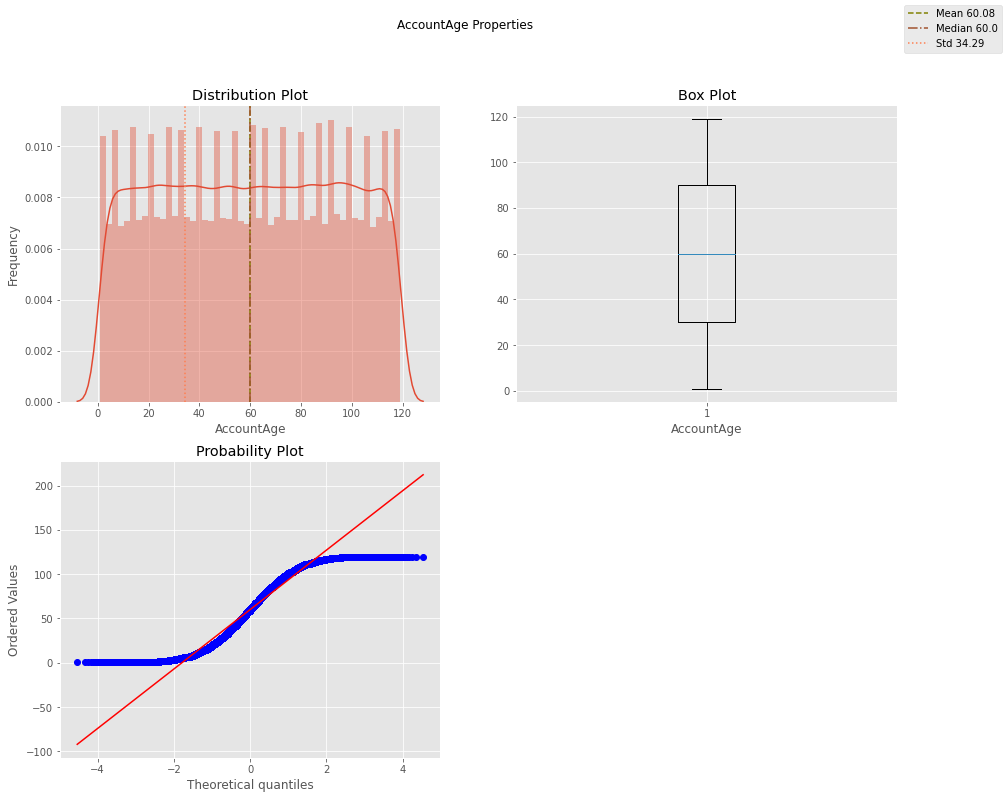

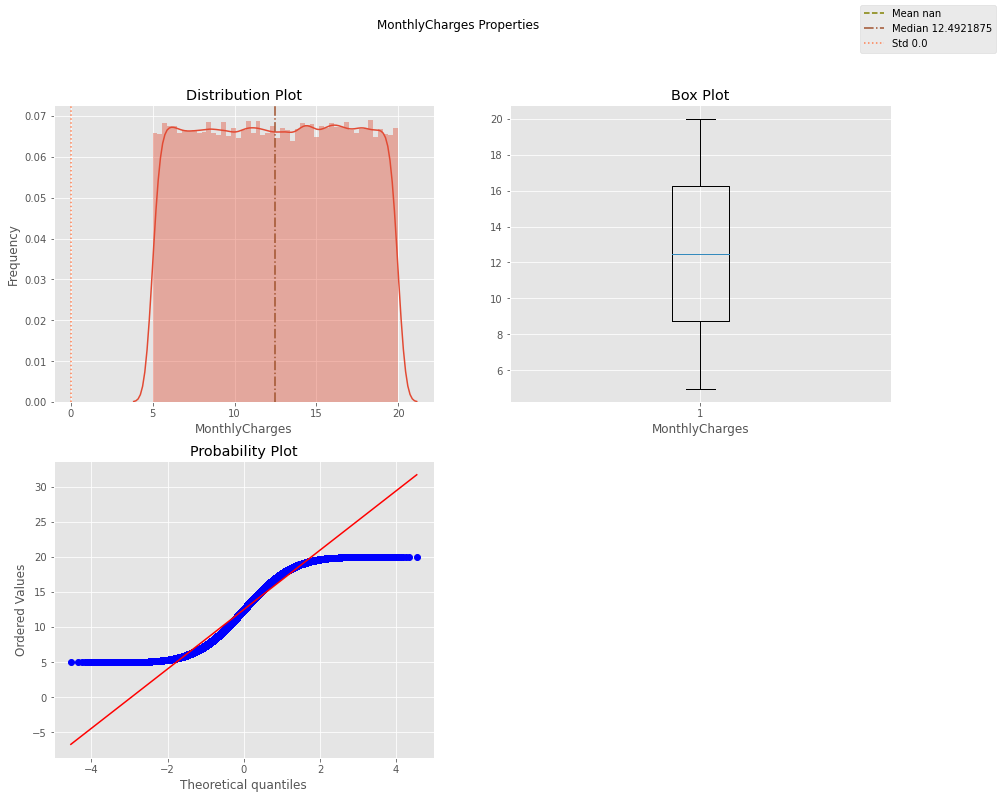

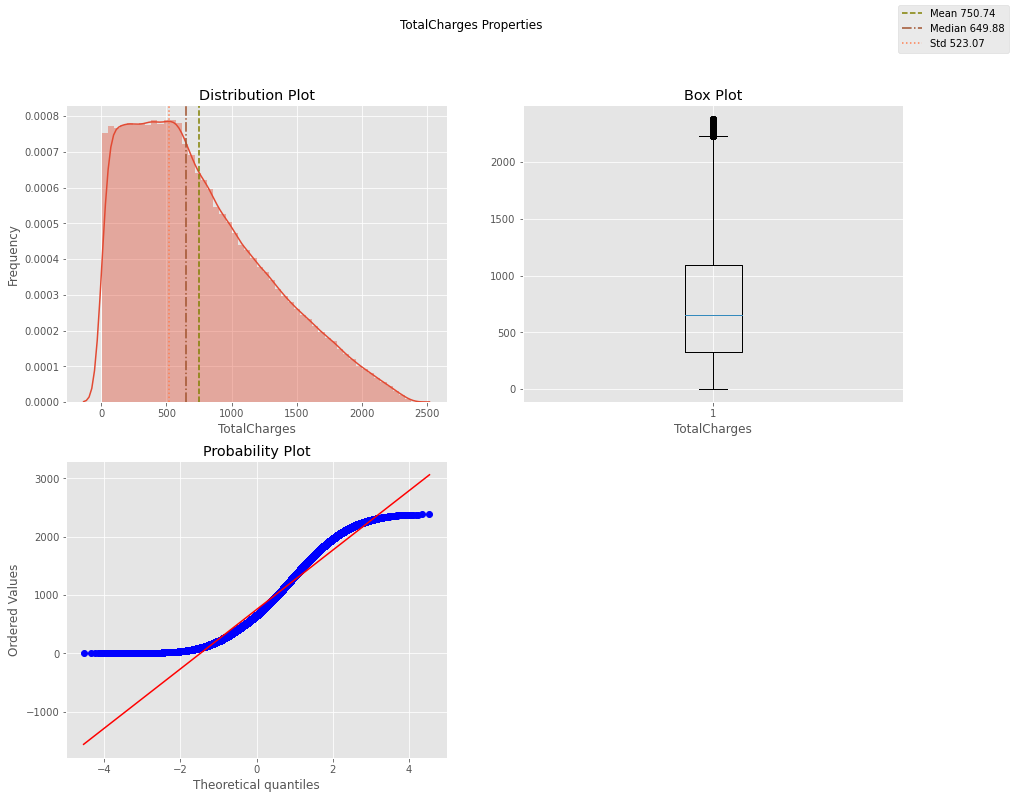

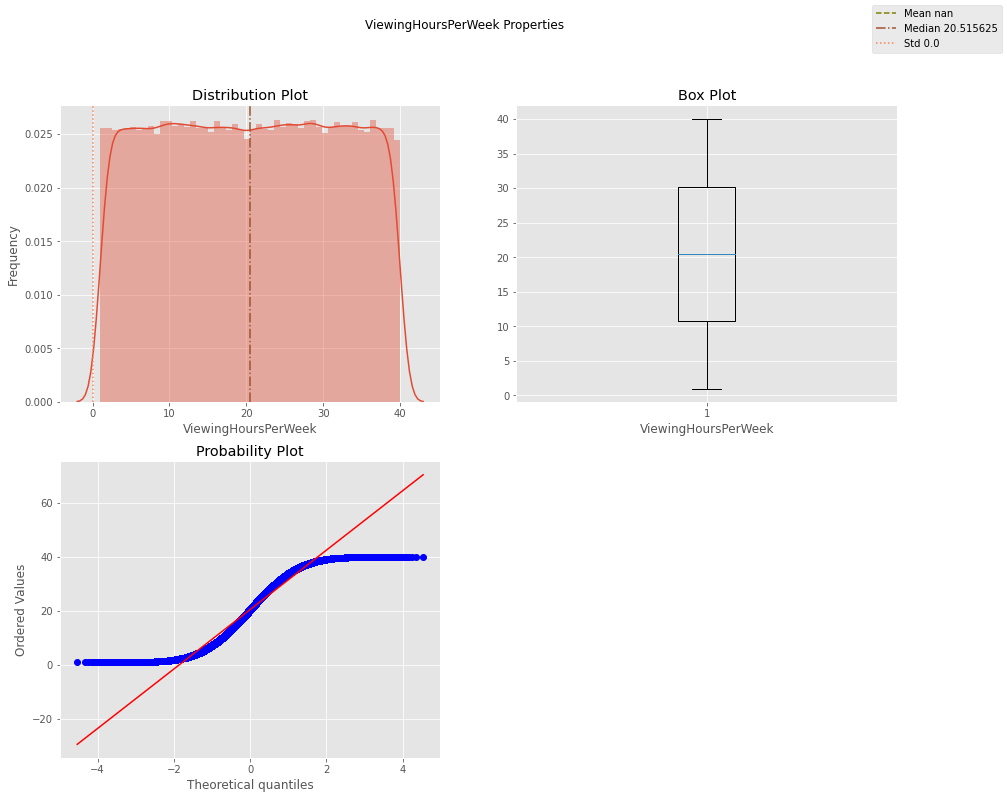

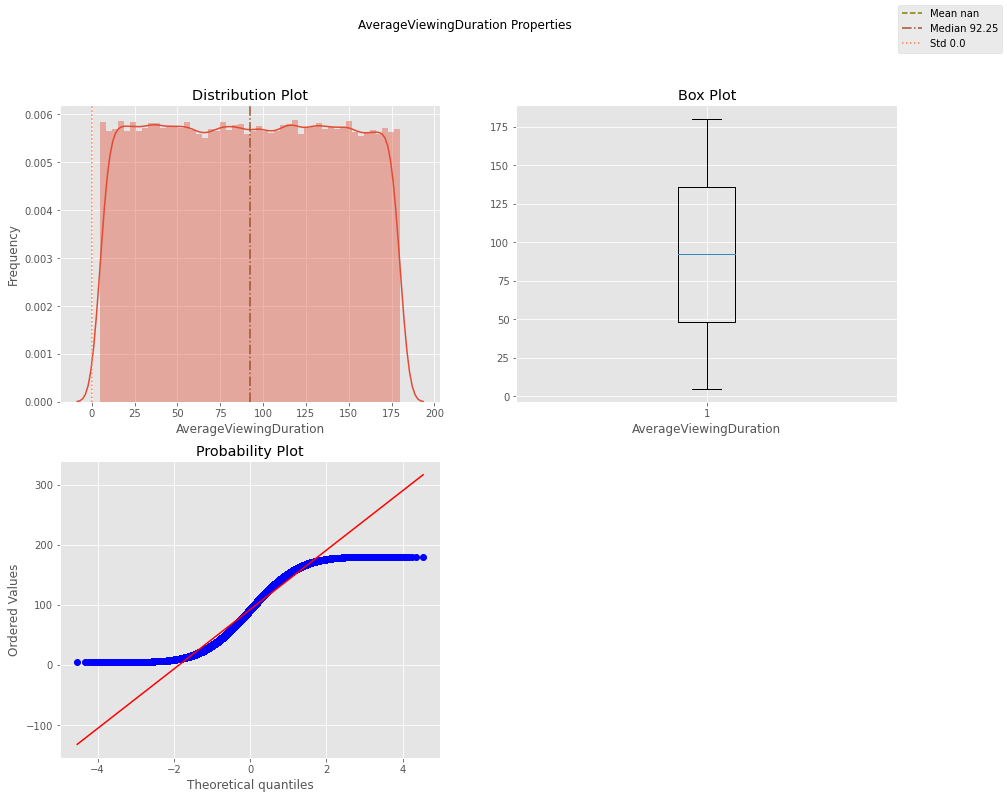

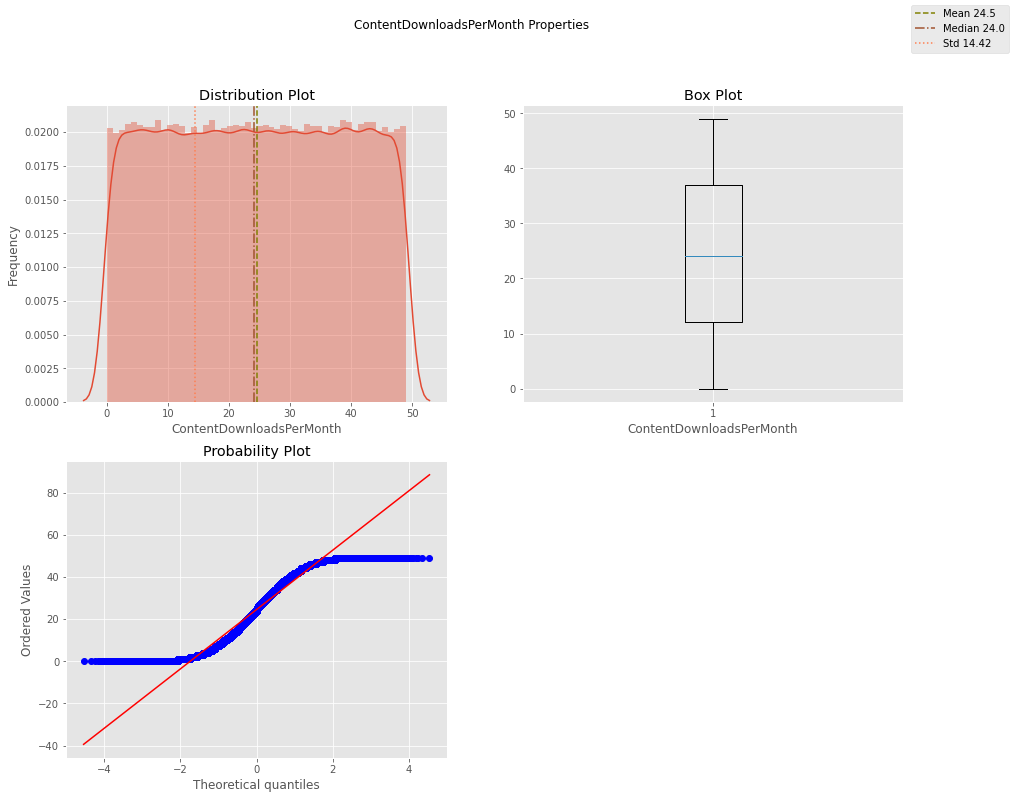

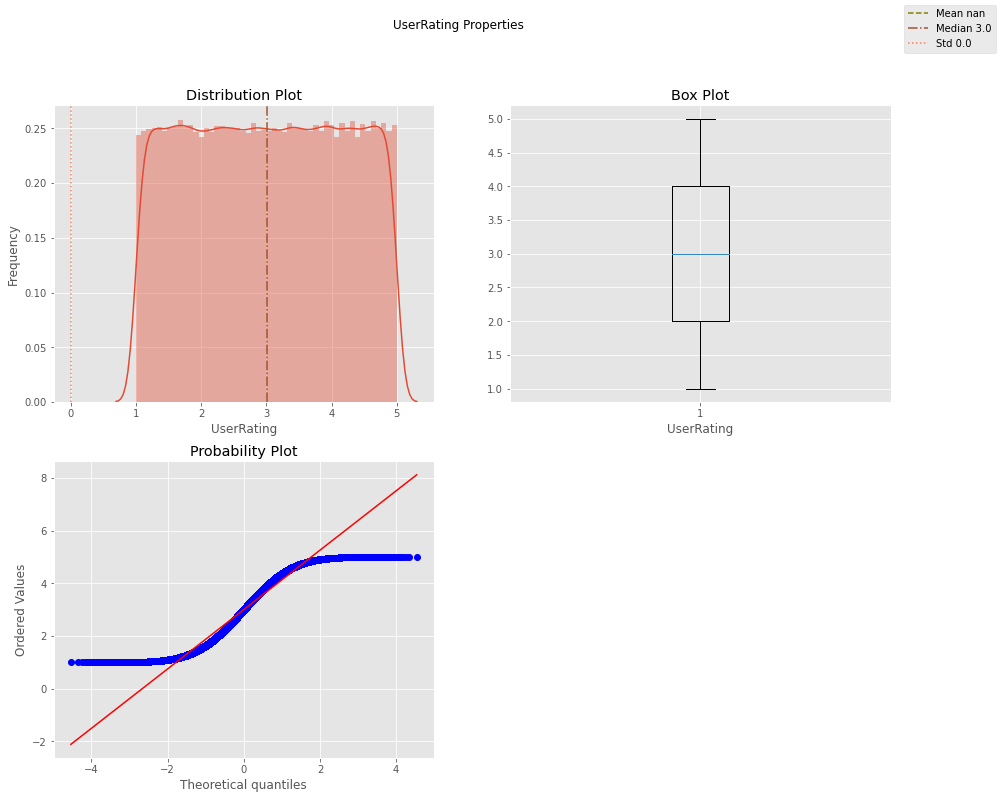

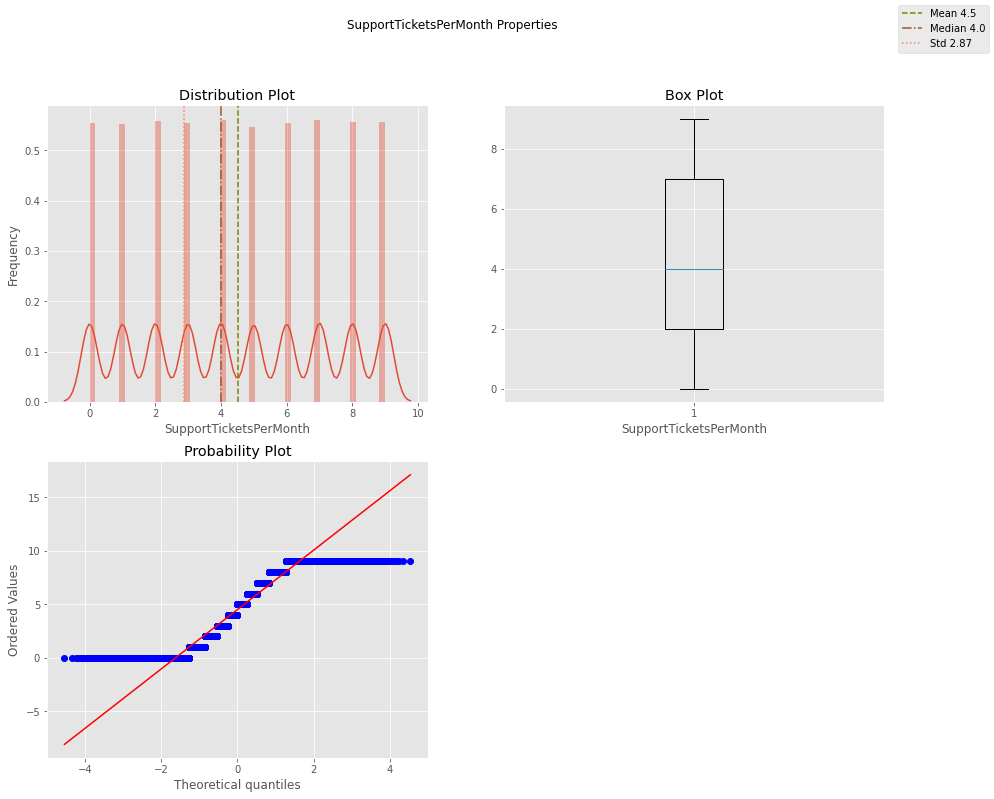

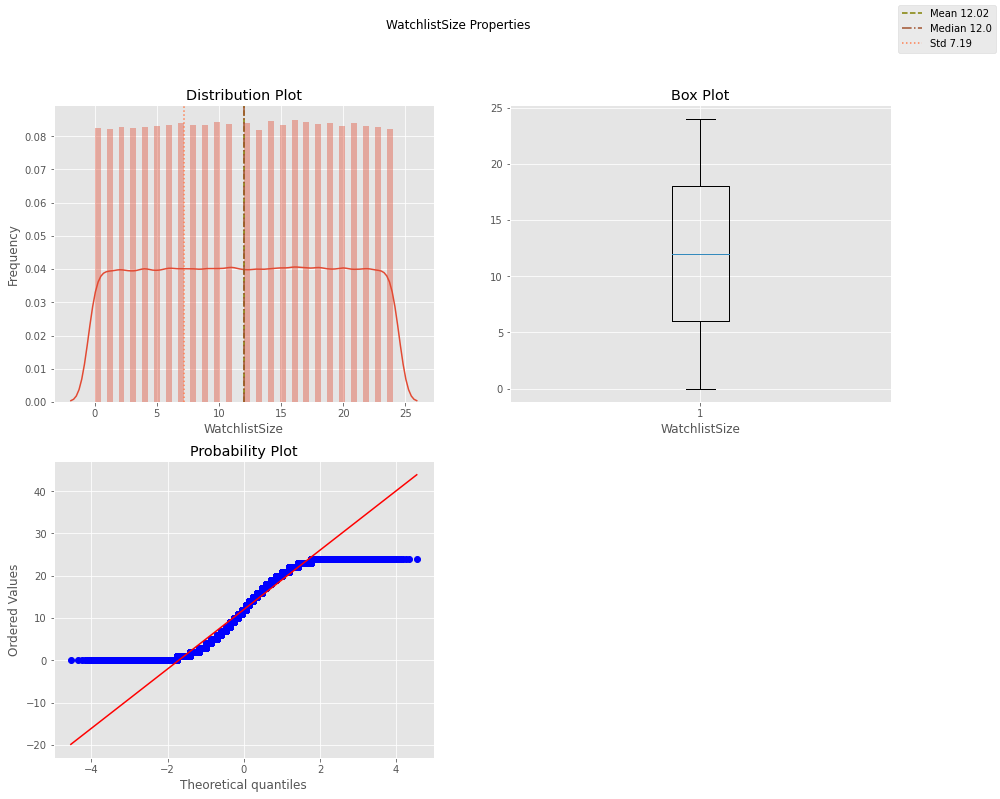

In [18]:
for feature in NumericFeatures:
    ShowNumericalFeaturesProperties(train_df,feature)
    plt.show()

In [19]:
categoricalFeatures = [feature for feature in train_df.columns if train_df[feature].dtype not in ['int16', 'float64', 'float16', 'int8']] 

In [20]:
def ShowCategoricalFeatures(data, feature):
    """
    Show properties of a categorical feature in a dataset.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - feature (str): The name of the categorical feature to analyze.

    Displays a set of visualizations for the specified categorical feature, including:
    1. Count plot showing the distribution of categories.
    2. Pie chart representing the proportions of each category.

    Args:
        data (DataFrame): The dataset containing the feature.
        feature (str): The name of the feature to analyze.
    """

    # Count the occurrences of each category in the feature
    category_counts = data[feature].value_counts()

    # Create a Matplotlib figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    # Set the main title for the subplots
    fig.suptitle(f'{feature} Properties')

    # Subplot 1: Count Plot
    sns.countplot(data[feature], ax=ax[0])

    # Set labels and title for the count plot
    ax[0].set_xlabel(feature, fontsize=10)
    ax[0].set_ylabel('Counts', fontsize=10)
    ax[0].set_title(f'{feature} Count Plot', y=1.05, fontsize=12)

    # Subplot 2: Pie Chart
    labels = category_counts.index
    sizes = category_counts.values

    ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

    # Set title for the pie chart
    ax[1].set_title(f'{feature} Pie Chart', y=1.05, fontsize=12)

    # Set aspect ratio to be equal, ensuring that the pie is drawn as a circle
    ax[1].axis('equal')

    # Show the plot
    plt.show()


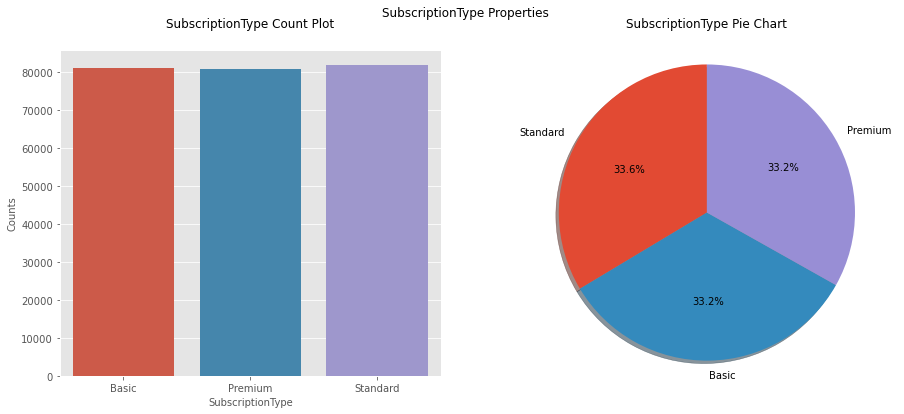

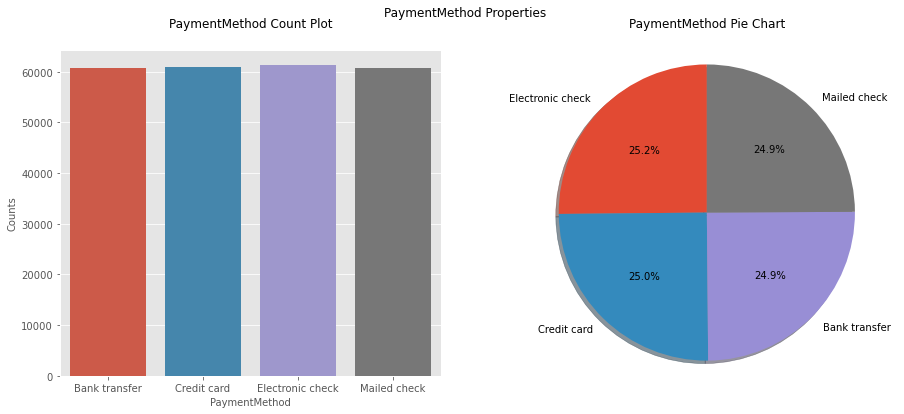

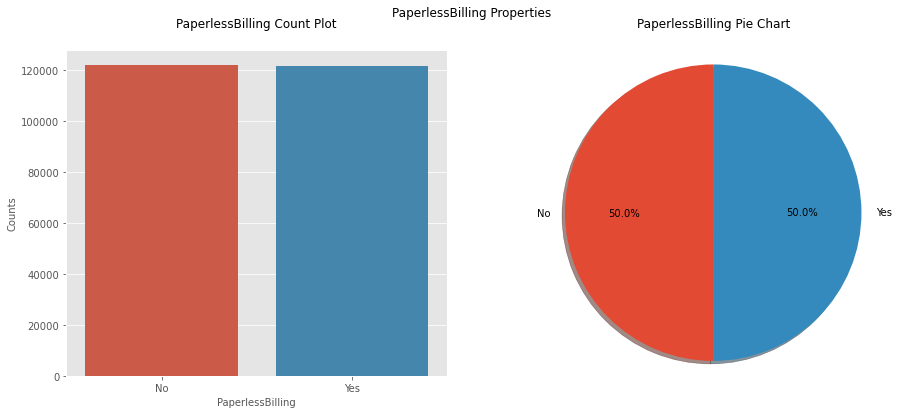

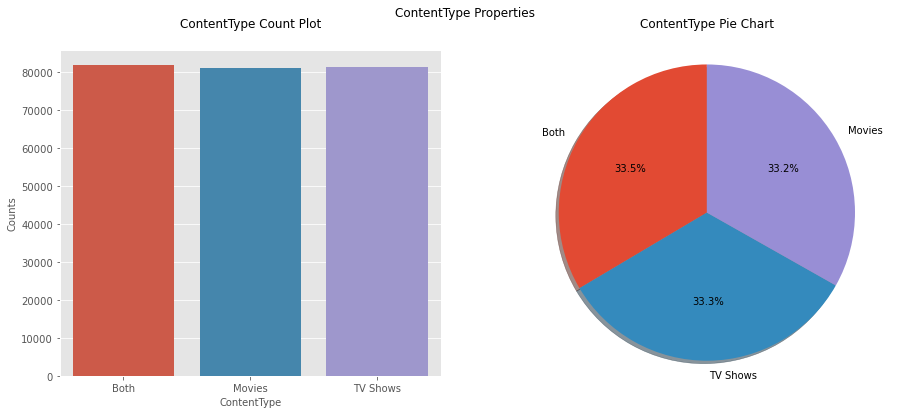

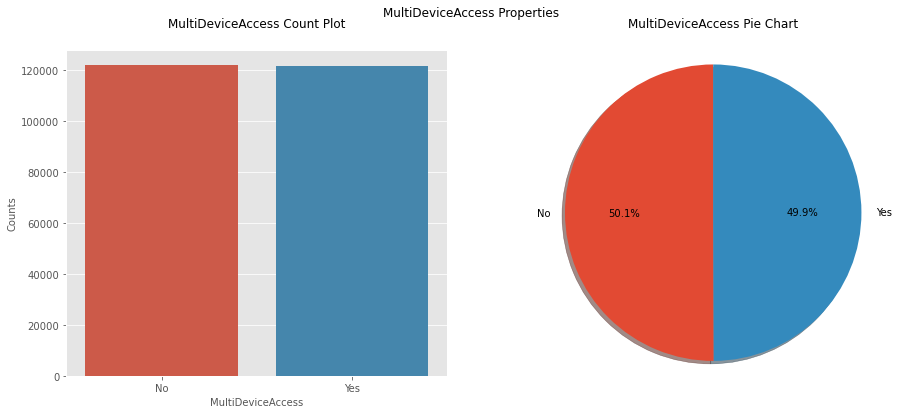

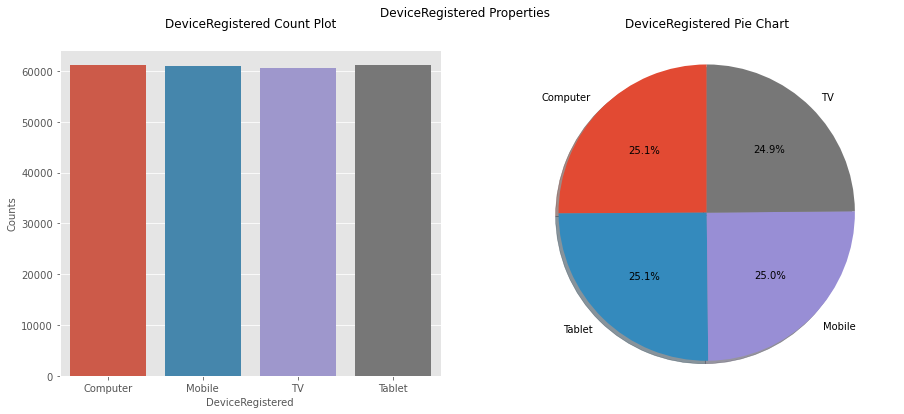

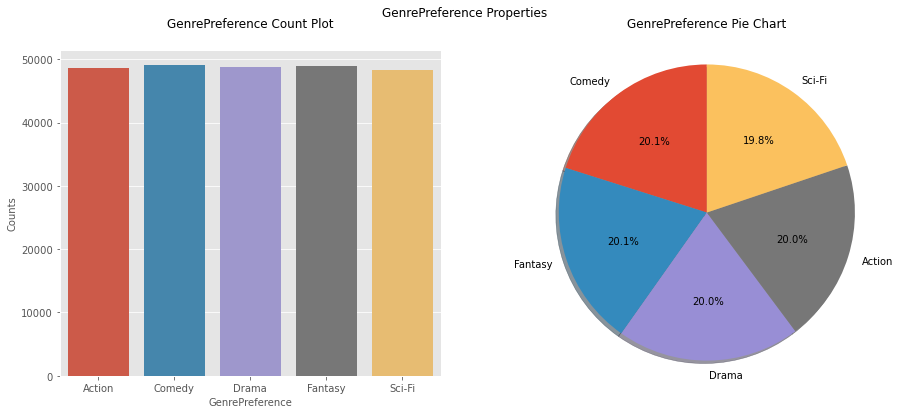

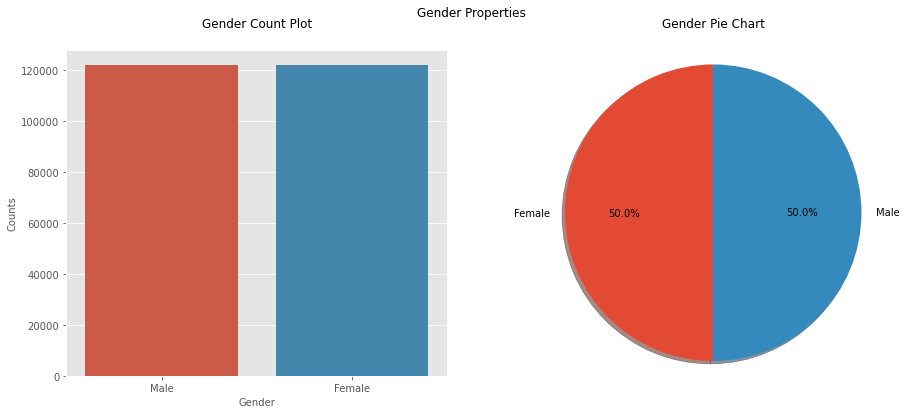

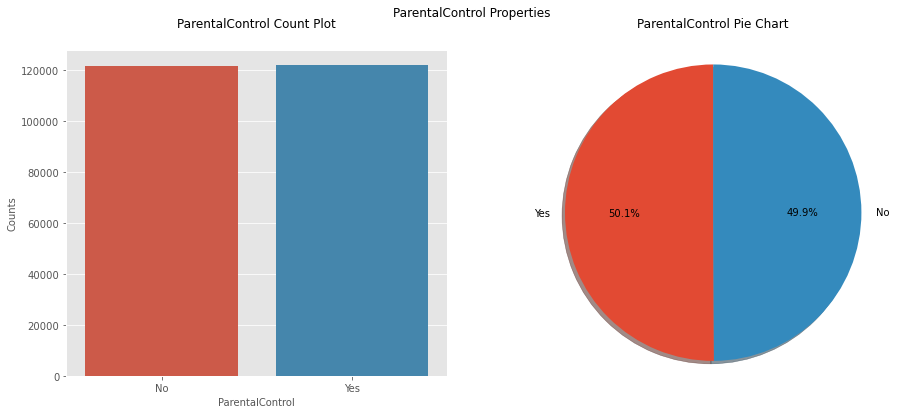

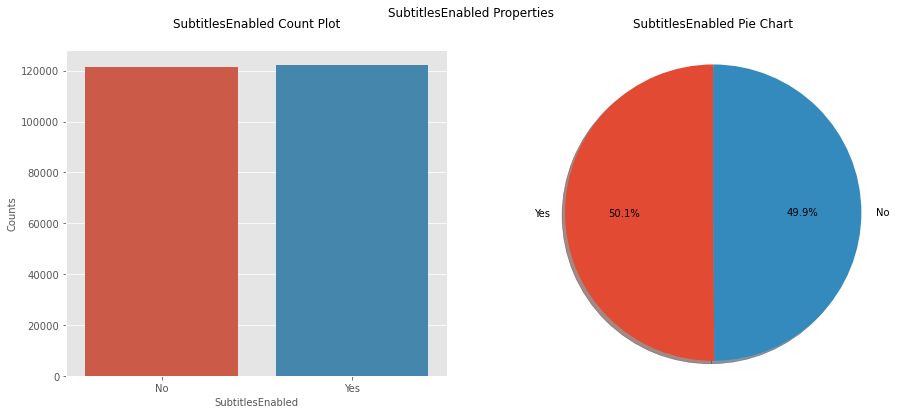

In [21]:
for feature in categoricalFeatures:
    ShowCategoricalFeatures(train_df,feature)
    plt.show()

<details>
<summary><b><h4>** Approach 1 (Univariant Analysis) Observations: (Click Here) **</h4></b></summary>
<br>

<b>Numeric Features:</b>

<details>
<summary><b>AccountAge</b></summary>
<br>

- AccountAge has a Uniform Distribution where mean and median are almost the same.
- No outliers or extreme values as per the box plot.
- As per the QQ plot, it does not follow a Normal Distribution.

</details>

<details>
<summary><b>MonthlyCharges</b></summary>
<br>

- MonthlyCharges have a Uniform Distribution where mean and median are almost the same.
- No outliers or extreme values as per the box plot.
- As per the QQ plot, it does not follow a Normal Distribution.

</details>

<details>
<summary><b>Total Charges</b></summary>
<br>

- Total Charges have Right Skewed (Positive Skewed) meaning the mean is greater than the median.
- Outliers or extreme values are on the higher side. There are some extreme values that need to be investigated.
- As per the QQ plot, it does not follow a Normal Distribution.

</details>

<details>
<summary><b>Viewing Hour Per Week</b></summary>
<br>

- Viewing Hour Per Week has a Uniform Distribution where mean and median are almost the same.
- No outliers or extreme values as per the box plot.
- As per the QQ plot, it does not follow a Normal Distribution.

</details>

<details>
<summary><b>Average Viewing Duration</b></summary>
<br>

- Average Viewing Duration has a Uniform Distribution where mean and median are almost the same.
- No outliers or extreme values as per the box plot.
- As per the QQ plot, it does not follow a Normal Distribution.

</details>

<details>
<summary><b>Content Download Per Month</b></summary>
<br>

- Content Download Per Month has a Uniform Distribution where mean and median are almost the same.
- No outliers or extreme values as per the box plot.
- As per the QQ plot, it does not follow a Normal Distribution.

</details>

<details>
<summary><b>User Rating</b></summary>
<br>

- User Rating has a Uniform Distribution where mean and median are almost the same.
- No outliers or extreme values as per the box plot.
- As per the QQ plot, it does not follow a Normal Distribution.

</details>

<details>
<summary><b>Support Ticket Per Month</b></summary>
<br>

- Support Ticket Per Month has a Uniform Distribution where mean and median are almost the same.
- No outliers or extreme values as per the box plot.
- As per the QQ plot, it does not follow a Normal Distribution.

</details>

<details>
<summary><b>Watch List Size</b></summary>
<br>

- Watch List Size has a Uniform Distribution where mean and median are almost the same.
- No outliers or extreme values as per the box plot.
- As per the QQ plot, it does not follow a Normal Distribution.

</details>

<b>Categorical Features:</b>

- SubscriptionType, PaymentMethod, PaperlessBilling, ContentType, MultiDeviceAccess, DeviceRegistered, GenrePreference, Gender, ParentalControl, SubtitlesEnabled are all categorical features showing almost balanced characteristics.

</details>


### Approach 2: Analyzing Customer Churn based on Account Age

#### Creating a Balanced Dataset for Churn Analysis

The `get_balanced_dataset` function is designed to create a balanced dataset for analyzing customer churn. This function takes a dataset and a binary feature, such as 'Churn,' and performs the following steps:

- Separates the dataset into 'Churn' and 'No Churn' subsets based on the provided binary feature.
- Calculates the minimum number of samples needed to achieve a balanced dataset, ensuring roughly equal representation of 'Churn' and 'No Churn' instances.
- Randomly samples 'Churn' and 'No Churn' data to create a balanced dataset with an equal number of both categories.
- Optionally shuffles the resulting dataset for further analysis.

The function provides a practical solution for addressing class imbalance when analyzing customer churn, facilitating more accurate and meaningful insights into churn-related patterns.


In [22]:
def get_balanced_dataset(data, feature):
    """
    Create a balanced dataset based on a binary 'Churn' feature.

    Given a DataFrame 'data' and a binary 'feature,' this function separates the dataset into 'Churn' and 'No Churn' subsets, calculates the minimum number of samples needed to achieve balance, and then randomly samples 'Churn' and 'No Churn' data to create a balanced dataset.

    Parameters:
    data (pd.DataFrame): The input dataset containing the binary 'feature.'
    feature (str): The name of the binary 'feature' to balance the dataset.

    Returns:
    pd.DataFrame: A balanced DataFrame with roughly equal samples of 'Churn' and 'No Churn.'

    Example:
    data = pd.DataFrame({'Churn': [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1]})
    balanced_data = get_balanced_dataset(data, 'Churn')
    """
    # Separate the dataset into 'Churn' and 'No Churn' subsets
    churn_df = data[data[feature] == 1]
    no_churn_df = data[data[feature] == 0]

    # Calculate the minimum number of samples to achieve balance
    min_samples = min(len(churn_df), len(no_churn_df))

    # Randomly sample 'Churn' and 'No Churn' data to create a balanced dataset
    balanced_df = pd.concat([churn_df.sample(n=min_samples), no_churn_df.sample(n=min_samples)])

    # The 'balanced_df' DataFrame now contains roughly equal samples of 'Churn' and 'No Churn'

    # You can shuffle the dataset if needed
    balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

    return balanced_df


#### Data Visualization Functions for Churn Analysis

##### ShowDistPlotForNumericFeatures

The `ShowDistPlotForNumericFeatures` function creates and displays distribution plots for a numeric feature. This function is helpful for visualizing the distribution of a numeric attribute, such as 'Monthly Charges,' with a focus on Churn (Yes) and Churn (No) customers. You can specify whether the analysis is based on minimum or maximum months. The function is designed to facilitate data exploration and uncover patterns related to customer churn based on the chosen numeric feature.

##### ShowCountPlotForCategoricalFeatures

The `ShowCountPlotForCategoricalFeatures` function is used for creating and displaying count plots for a categorical feature. It allows you to visualize the counts of different categories within the feature, with a specific focus on Churn (Yes) and Churn (No) customers. This function is valuable for exploring categorical attributes, such as 'Payment Method' or 'Device Registered,' and identifying potential patterns that may influence customer churn decisions.

These functions are essential tools for data visualization and analysis, aiding in the identification of insights and trends related to customer churn based on numeric and categorical attributes.

In [23]:
def ShowDistPlotForNumericFeatures(data,feature,Min=False):
    """
    Create and display distribution plots for a numeric feature.
    
    Parameters:
    data (str): dataset.
    feature (str): The name of the numeric feature to visualize.
    Min (bool): Working with min or max months
    
    Returns:
    None
    """
    # Create a Matplotlib figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    # Plot distribution for Churn (Yes) customers with only 1 month of data
    sns.distplot(data.loc[data['Churn'] == 1][feature], ax=ax[0])
    
    mean = data.loc[data['Churn'] == 1][feature].mean()
    median = data.loc[data['Churn'] == 1][feature].median()
    
    ax[0].axvline(np.round(mean,2),label=f'mean {np.round(mean,2)}',color='olive',ls='--')
    ax[0].axvline(np.round(median,2),label=f'median {np.round(median,2)}',color='darkolivegreen',ls='-.')

    # Set plot labels and title for the first subplot
    ax[0].set_xlabel(feature, fontsize=10)
    ax[0].set_ylabel('Frequency', fontsize=10)
    ax[0].set_title(f'Churn (Yes) Customers with only {"Min" if Min else "Max"} Month {feature} Dist Plot', y=1.05, fontsize=12)
    ax[0].legend()
    print('Churn Customer data Positive Skewed' if mean > median else 'Churn Customer data Negative Skewed')
    
    
    # Plot distribution for Churn (No) customers with only 1 month of data
    sns.distplot(data.loc[data['Churn'] == 0][feature], ax=ax[1])
    
    mean = np.round(data.loc[data['Churn'] == 0][feature].mean(),2)
    median = np.round(data.loc[data['Churn'] == 0][feature].median(),2)
    
    ax[1].axvline(np.round(mean,2),label=f'mean {np.round(mean,2)}',color='olive',ls='--')
    ax[1].axvline(np.round(median,2),label=f'median {np.round(median,2)}',color='darkolivegreen',ls='-.')

    # Set plot labels and title for the second subplot
    ax[1].set_xlabel(feature, fontsize=10)
    ax[1].set_ylabel('Frequency', fontsize=10)
    ax[1].set_title(f'Churn (No) Customers with only {"Min" if Min else "Max"} Month {feature} Dist Plot', y=1.05, fontsize=12)
    ax[1].legend()
    print('Not Churn Customer data Positive Skewed' if mean > median else 'Not Churn Customer data Negative Skewed')
    # Show the plot
    plt.show()

def ShowCountPlotForCategoricalFeatures(data,feature):
    """
    Create and display count plots for a categorical feature.
    
    Parameters:
    feature (str): The name of the categorical feature to visualize.
    
    Returns:
    None
    """
    # Create a Matplotlib figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    # Plot count for Churn (Yes) customers for the specified feature
    sns.countplot(data.loc[data['Churn'] == 1][feature], ax=ax[0])

    # Set plot labels and title for the first subplot
    ax[0].set_xlabel(feature, fontsize=10)
    ax[0].set_ylabel('Counts', fontsize=10)
    ax[0].set_title(f'Churn (Yes) Customers {feature} Count Plot', y=1.05, fontsize=12)

    # Plot count for Churn (No) customers for the specified feature
    sns.countplot(data.loc[data['Churn'] == 0][feature], ax=ax[1])

    # Set plot labels and title for the second subplot
    ax[1].set_xlabel(feature, fontsize=10)
    ax[1].set_ylabel('Counts', fontsize=10)
    ax[1].set_title(f'Churn (No) Customers with {feature} Count Plot', y=1.05, fontsize=12)

    # Show the plot
    plt.show()

#### Analyzing Customers with Minimum Account Age

##### Goal for this section:
The goal for this section is to analyze customers with minimum account age to determine if there are any significant patterns they follow that can be used to distinguish between churn and not churn customers.

##### Key Questions to Address:
- Why a customer who just joined has left our services?
- Is there any key features on which we can determine if a customer will churn or not?
- Does the minimum account age have a significant impact on predicting churn?


In [24]:
AccountAgeMin = train_df['AccountAge'].min()

In [25]:
Customer_With_Min_AccountAge = get_balanced_dataset(train_df.loc[train_df['AccountAge'] == AccountAgeMin],'Churn')

In [26]:
Customer_With_Min_AccountAge.shape

(1324, 20)

In [27]:
Customer_With_Min_AccountAge.sample(5)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
804,1,5.742188,5.743715,Standard,Bank transfer,No,Both,Yes,Computer,4.101562,39.40625,25,Comedy,3.625000,0,Male,18,Yes,No,1
894,1,15.343750,15.342542,Basic,Mailed check,Yes,TV Shows,No,TV,33.906250,65.18750,43,Fantasy,2.382812,4,Female,11,No,Yes,0
830,1,5.617188,5.616923,Premium,Mailed check,No,Both,Yes,Computer,15.804688,122.56250,30,Drama,4.042969,7,Female,16,Yes,No,0
551,1,5.000000,4.999861,Premium,Bank transfer,Yes,Both,No,TV,39.625000,66.50000,4,Action,4.453125,7,Female,3,Yes,Yes,0
841,1,12.843750,12.844174,Standard,Mailed check,Yes,Movies,No,TV,34.062500,170.25000,30,Fantasy,2.650391,9,Female,5,Yes,No,0


In [28]:
Customer_With_Min_AccountAge['Churn'].value_counts()

1    662
0    662
Name: Churn, dtype: int64

Churn Customer data Negative Skewed
Not Churn Customer data Negative Skewed


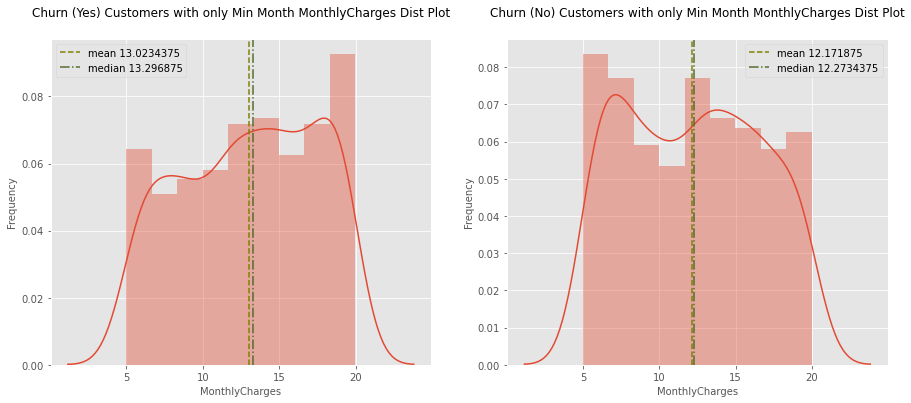

In [29]:
ShowDistPlotForNumericFeatures(Customer_With_Min_AccountAge,'MonthlyCharges',True)

Churn Customer data Positive Skewed
Not Churn Customer data Negative Skewed


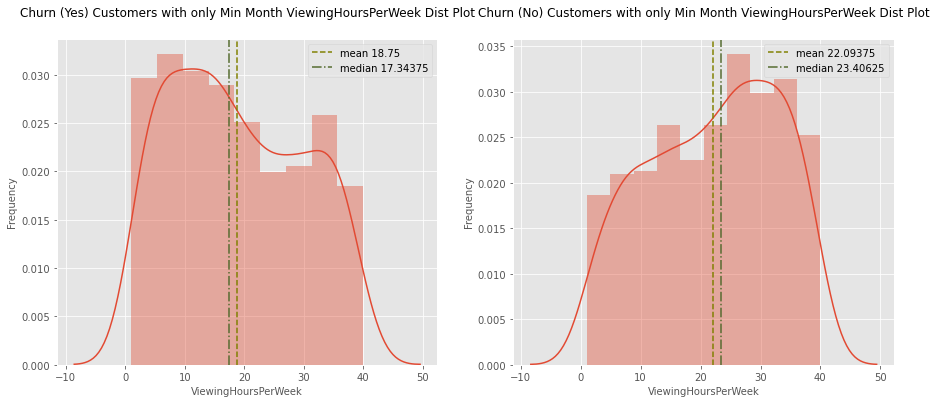

In [30]:
ShowDistPlotForNumericFeatures(Customer_With_Min_AccountAge,'ViewingHoursPerWeek',True)

Churn Customer data Positive Skewed
Not Churn Customer data Positive Skewed


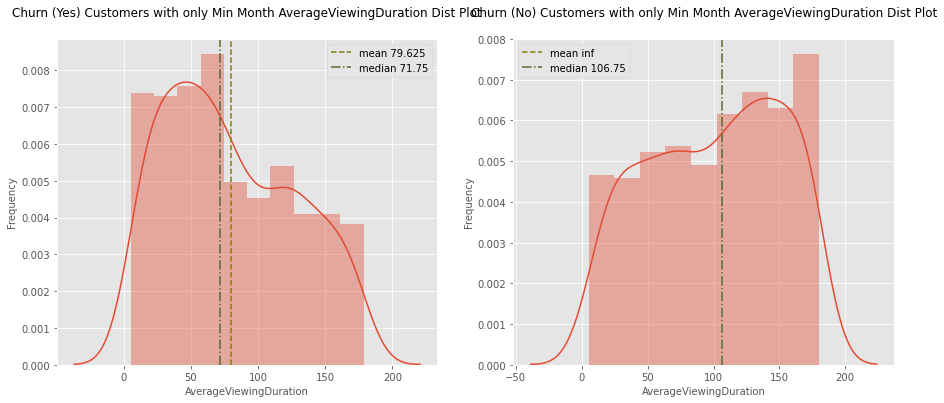

In [31]:
ShowDistPlotForNumericFeatures(Customer_With_Min_AccountAge,'AverageViewingDuration',True)

Churn Customer data Positive Skewed
Not Churn Customer data Negative Skewed


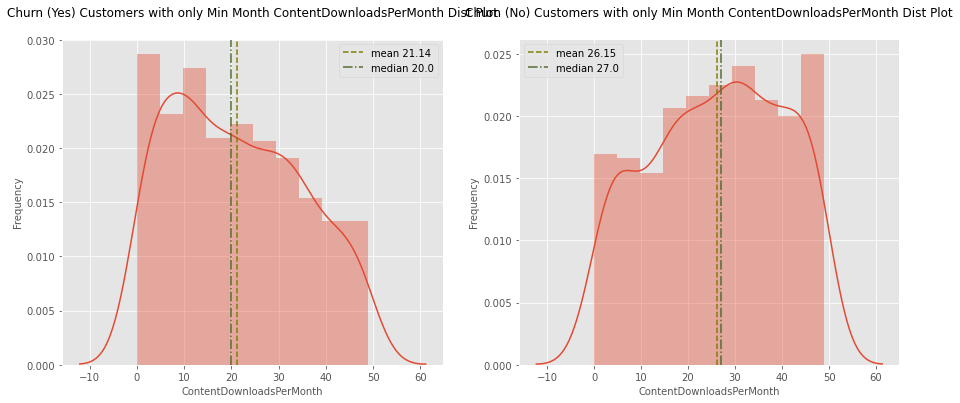

In [32]:
ShowDistPlotForNumericFeatures(Customer_With_Min_AccountAge,'ContentDownloadsPerMonth',True)

Churn Customer data Negative Skewed
Not Churn Customer data Positive Skewed


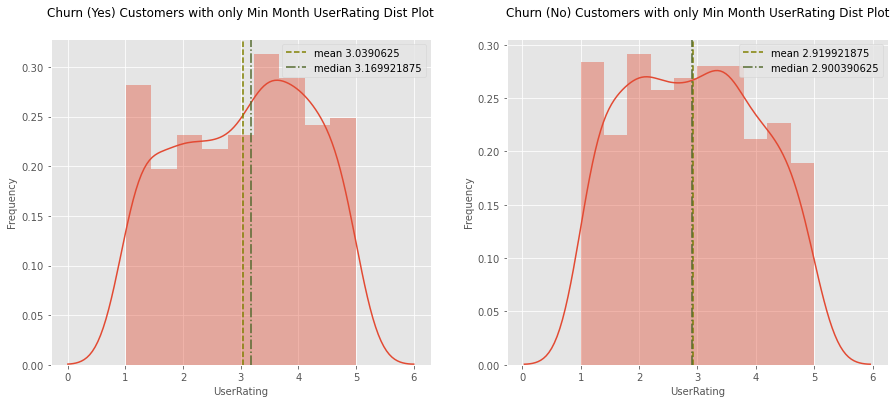

In [33]:
ShowDistPlotForNumericFeatures(Customer_With_Min_AccountAge,'UserRating',True)

Churn Customer data Positive Skewed
Not Churn Customer data Positive Skewed


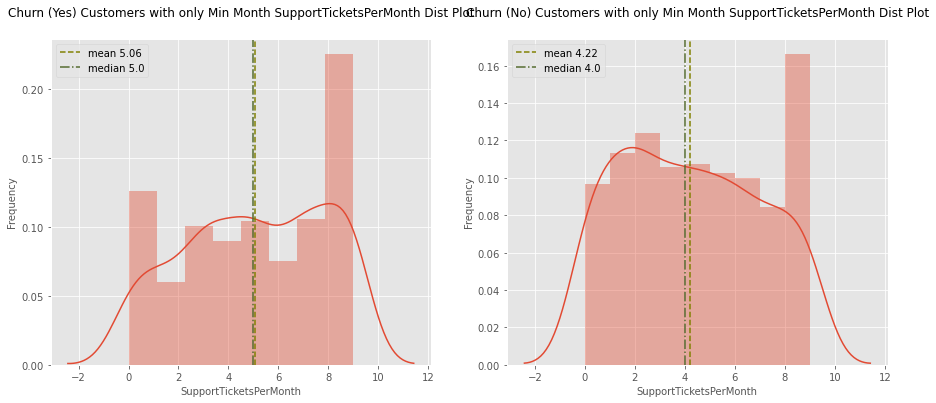

In [34]:
ShowDistPlotForNumericFeatures(Customer_With_Min_AccountAge,'SupportTicketsPerMonth',True)

Churn Customer data Positive Skewed
Not Churn Customer data Positive Skewed


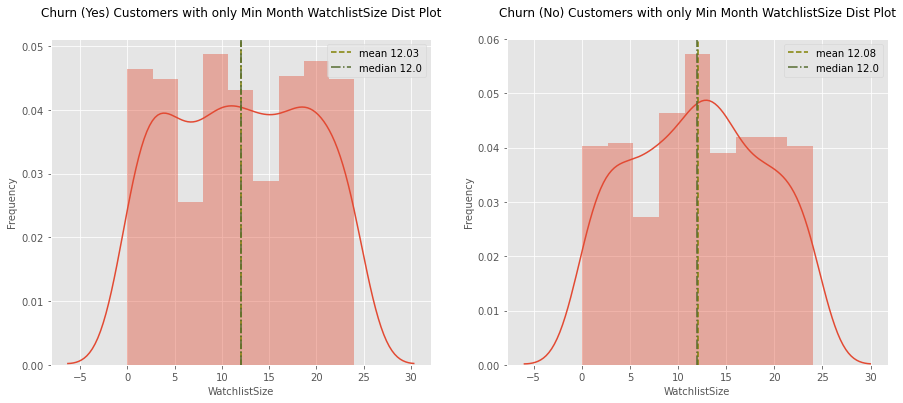

In [35]:
ShowDistPlotForNumericFeatures(Customer_With_Min_AccountAge,'WatchlistSize',True)

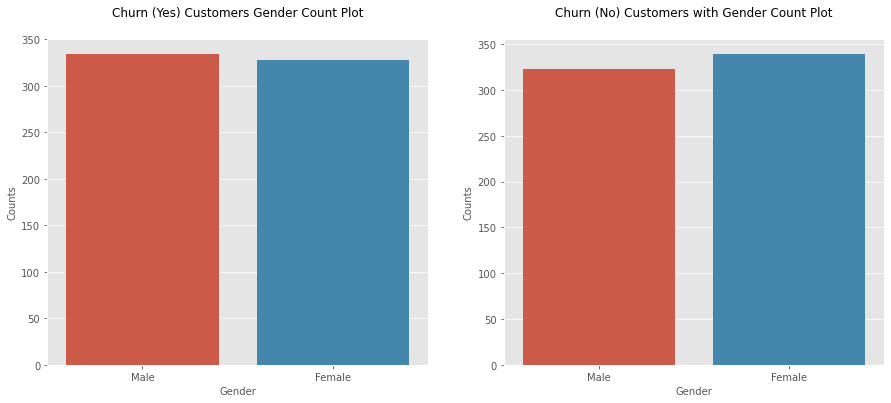

In [36]:
ShowCountPlotForCategoricalFeatures(Customer_With_Min_AccountAge,'Gender')

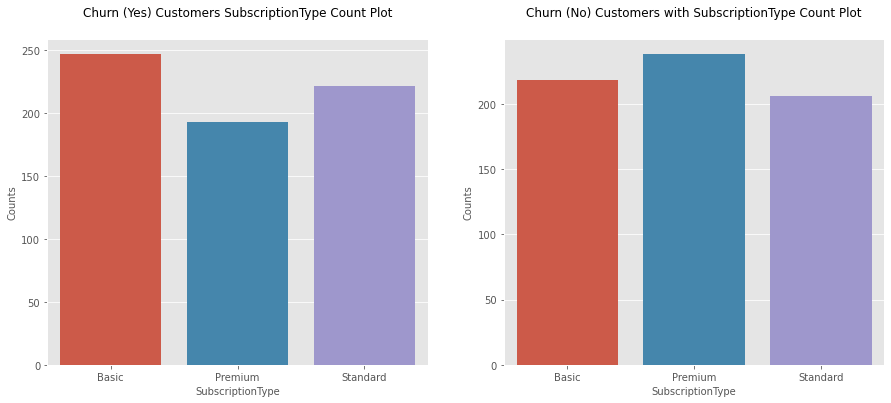

In [37]:
ShowCountPlotForCategoricalFeatures(Customer_With_Min_AccountAge,'SubscriptionType')

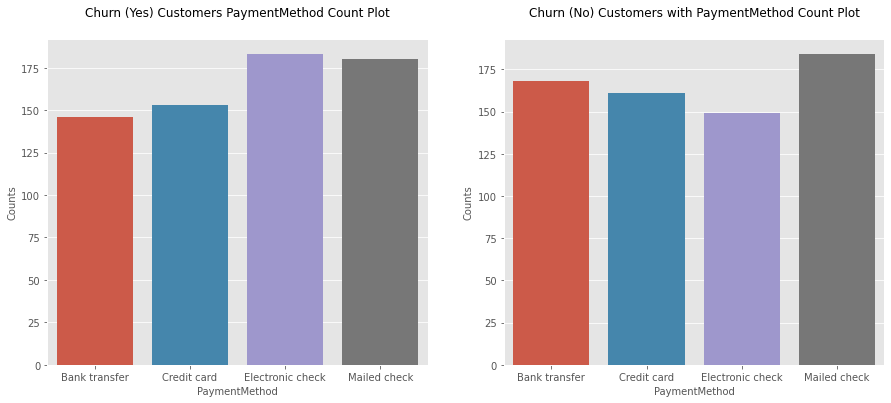

In [38]:
ShowCountPlotForCategoricalFeatures(Customer_With_Min_AccountAge,'PaymentMethod')

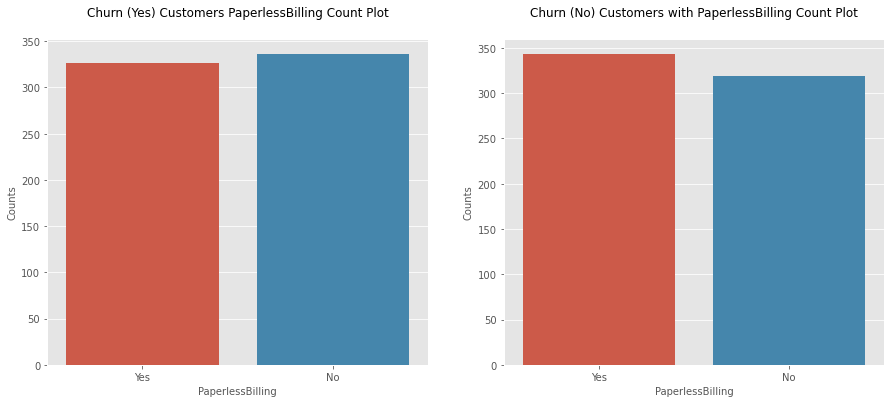

In [39]:
ShowCountPlotForCategoricalFeatures(Customer_With_Min_AccountAge,'PaperlessBilling')

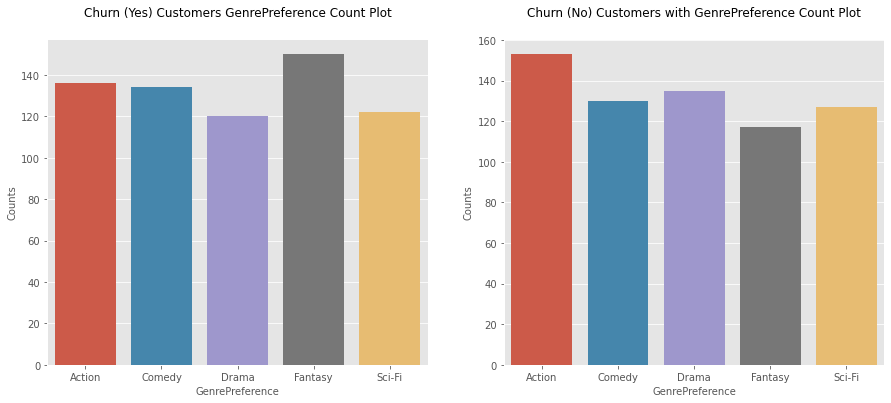

In [40]:
ShowCountPlotForCategoricalFeatures(Customer_With_Min_AccountAge,'GenrePreference')

> **Note:**
> - **Positive Skewness:**
>   - If the mean is greater than the median (μ > M), the distribution is positively skewed.
>   - In a positively skewed distribution, the tail on the right side is longer or fatter, and most of the data points are concentrated on the left side, closer to the median. This means that there are relatively few data points with very high values on the right side of the distribution, which pulls the mean to the right, making it greater than the median.
>
> - **Negative Skewness:**
>   - If the mean is less than the median (μ < M), the distribution is negatively skewed.
>   - In a negatively skewed distribution, the tail on the left side is longer or fatter, and most of the data points are concentrated on the right side, closer to the median. This means that there are relatively few data points with very low values on the left side of the distribution, which pulls the mean to the left, making it less than the median.
>
> - **Symmetrical Distribution:**
>   - If the mean is approximately equal to the median (μ ≈ M), the distribution is close to being symmetric, and the skewness is close to zero. This implies that there is a balance between data points on both sides of the median, resulting in a symmetric distribution.


<details>
<summary><strong>Click to Expand/Collapse - Analyzing Customers with Minimum Account Age</strong></summary>

In this analysis, we are examining the behavior of customers with respect to their minimum account age, specifically focusing on churn (Churn Customers) and non-churn (Not Churn Customers) cases.

<details>
<summary><strong>Monthly Charges</strong></summary>

- **Churn Customers:**
    - Monthly Charges are negatively skewed (Mean < Median). This means that if we randomly pick customers with a minimum account age of 1, they tend to belong to the group that pays around 0 - 15 on their first month.

- **Not Churn Customers:**
    - Monthly Charges are positively skewed (Mean > Median). In this case, if we randomly pick customers with a minimum account age of 1, they belong to the group that pays around 15 - 20 on their first month.
</details>

<details>
<summary><strong>Viewing Hours Per Week</strong></summary>

- **Churn Customers:**
    - Viewing Hours Per Week are positively skewed (Mean > Median). If we randomly pick customers with a minimum account age of 1, they belong to the group with a high weekly viewing time.

- **Not Churn Customers:**
    - Viewing Hours Per Week are negatively skewed (Mean < Median). Customers with a minimum account age of 1 belong to the group with weekly viewing times ranging from 0 to 20.
</details>

<details>
<summary><strong>Average Viewing Duration</strong></summary>

- **Churn Customers:**
    - Average Viewing Duration is positively skewed (Mean > Median). Customers with a minimum account age of 1 in this group have a high average viewing duration.

- **Not Churn Customers:**
    - Average Viewing Duration is negatively skewed (Mean < Median). Customers with a minimum account age of 1 belong to the group with average viewing durations ranging from 0 to 100 during their early months.
</details>

<details>
<summary><strong>Content Downloads Per Month</strong></summary>

- **Churn Customers:**
    - Content Downloads Per Month is positively skewed (Mean > Median). Customers with a minimum account age of 1 in this group have high content downloads per month.

- **Not Churn Customers:**
    - Content Downloads Per Month is negatively skewed (Mean < Median). Customers with a minimum account age of 1 belong to the group with content downloads per month ranging from 0 to 30 during their early months.
</details>

<details>
<summary><strong>User Rating</strong></summary>

- **Churn Customers:**
    - User Rating is negatively skewed (Mean < Median). Customers with a minimum account age of 1 in this group tend to give lower ratings, and they also exhibit churn behavior. The skewness of user ratings with a minimum account age may provide insights into the reasons behind customer churn.

- **Not Churn Customers:**
    - User Rating is symmetrically skewed (Mean == Median). If we randomly pick customers with a minimum account age of 1, their user ratings are almost normally distributed.
</details>

<details>
<summary><strong>Support Tickets Per Month</strong></summary>

- **Churn Customers:**
    - Support Tickets Per Month is symmetrically skewed (Mean == Median). If we randomly pick customers with a minimum account age of 1, the distribution is almost normally distributed.

- **Not Churn Customers:**
    - Support Tickets Per Month is symmetrically skewed (Mean == Median). If we randomly pick customers with a minimum account age of 1, the distribution is almost normally distributed.
</details>

<details>
<summary><strong>Watchlist Size</strong></summary>

- **Churn Customers:**
    - Watchlist Size is symmetrically skewed (Mean == Median). If we randomly pick customers with a minimum account age of 1, the distribution is almost normally distributed.

- **Not Churn Customers:**
    - Watchlist Size is symmetrically skewed (Mean == Median). If we randomly pick customers with a minimum account age of 1, the distribution is almost normally distributed.
</details>

<details>
<summary><strong>Gender</strong></summary>

- **Churn Customers:**
    - Both genders show equal behavior.

- **Not Churn Customers:**
    - Both genders show equal behavior.
</details>

<details>
<summary><strong>Subscription Type</strong></summary>

- **Churn Customers:**
    - Most customers with churn behavior opt for Basic, followed by Standard. Fewer customers choose Premium. It may be worth focusing on customers who just joined with Premium and Standard subscription types.

- **Not Churn Customers:**
    - Customers without churn behavior mostly go for Premium, followed by Standard, and lastly Basic.
</details>

<details>
<summary><strong>Payment Method</strong></summary>

- **Churn Customers:**
    - Electronic check is the most popular payment method for customers with churn behavior, followed by mail check. Bank transactions and credit card payments are less common.

- **Not Churn Customers:**
    - Customers without churn behavior prefer mailed checks, followed by bank transactions, credit card payments, and electronic checks.
</details>

<details>
<summary><strong>Paperless Billing</strong></summary>

- **Churn Customers:**
    - Both paperless billing options show equal behavior.

- **Not Churn Customers:**
    - Both paperless billing options show equal behavior.
</details>

<details>
<summary><strong>Genre Preference</strong></summary>

- Genre preference shows equal behavior for both churn and non-churn customers.
</details>

</details>


<mark style="background-color: #add8e6; padding: 10px; display: block;">
<strong>Analyzing Customers with Minimum Account Age Observation:</strong> The account Age month with a value of 1 reveals numerous insights about customer behavior, including churn or non-churn status. This is particularly evident in the following variables:
</mark>

- MonthlyCharges
- Viewing Hours Per Week
- Average Viewing Duration
- User Rating
- Subscription Type
- Payment Methods


#### Analyzing Customers with Maximum Account Age

##### Goal for this section:
The goal for this section is to analyze customers with maximum account age to determine if there are any significant patterns they follow that can be used to distinguish between churn and not churn customers.

##### Key Questions to Address:
- Why a customer who just joined has left our services?
- Is there any key features on which we can determine if a customer will churn or not?
- Does the minimum account age have a significant impact on predicting churn?
- Are these extreme values are outlier or we can use them in predictions? 

In [41]:
AccountAgeMaxValues = list(set(train_df.sort_values(by='AccountAge',ascending=False)['AccountAge'][:40000].value_counts().index))

In [42]:
# Maximum days a customer have a subscription

print(AccountAgeMaxValues)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [43]:
Customer_With_Max_AccountAge = get_balanced_dataset(train_df.loc[train_df['AccountAge'].isin(AccountAgeMaxValues)],'Churn')

In [44]:
Customer_With_Max_AccountAge.shape

(6826, 20)

In [45]:
Customer_With_Max_AccountAge.sample(5)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
6473,108,7.281250,786.321206,Premium,Credit card,No,TV Shows,Yes,Mobile,35.750000,49.50000,37,Comedy,4.761719,4,Male,13,No,No,0
5142,111,16.468750,1827.934350,Standard,Electronic check,No,TV Shows,No,TV,23.046875,134.62500,42,Sci-Fi,1.583008,4,Female,11,Yes,Yes,0
2116,116,6.722656,779.923750,Premium,Electronic check,No,Movies,Yes,Computer,28.890625,29.21875,30,Comedy,3.679688,8,Female,5,No,Yes,1
1390,115,13.687500,1574.292245,Standard,Mailed check,Yes,Movies,Yes,TV,2.031250,42.46875,31,Sci-Fi,1.791016,9,Male,11,No,Yes,0
5591,103,13.679688,1408.749911,Basic,Credit card,Yes,Both,No,TV,17.234375,28.75000,27,Sci-Fi,2.482422,1,Female,12,Yes,No,1


In [46]:
Customer_With_Max_AccountAge['Churn'].value_counts()

1    3413
0    3413
Name: Churn, dtype: int64

Churn Customer data Negative Skewed
Not Churn Customer data Negative Skewed


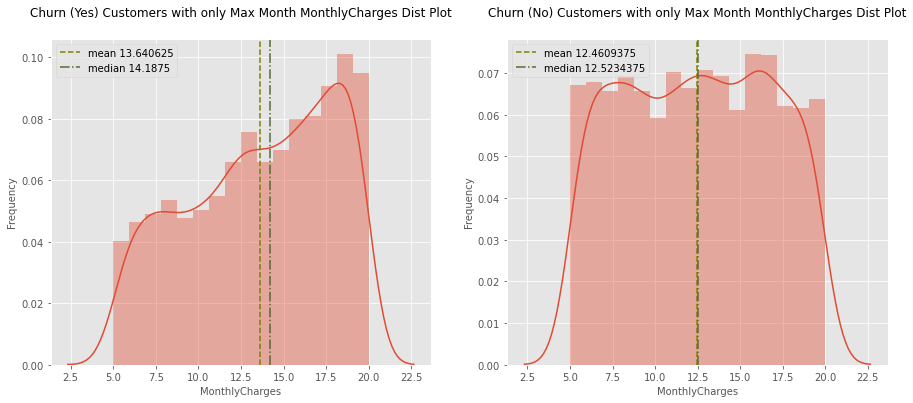

In [47]:
ShowDistPlotForNumericFeatures(Customer_With_Max_AccountAge,'MonthlyCharges')

Churn Customer data Positive Skewed
Not Churn Customer data Positive Skewed


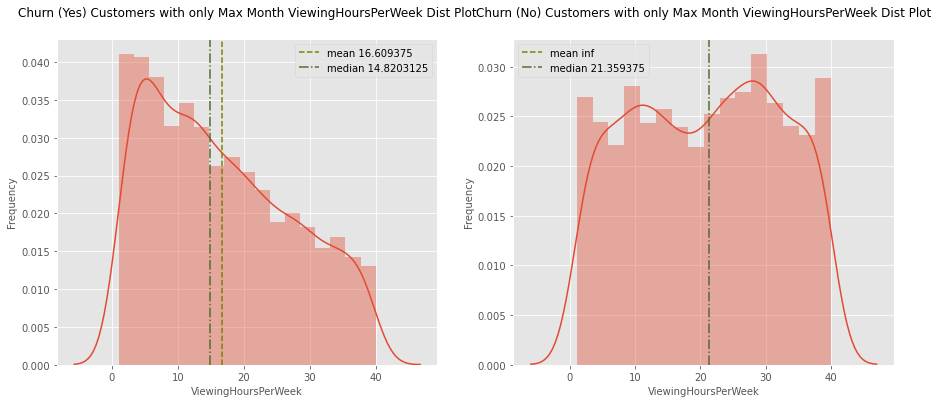

In [48]:
ShowDistPlotForNumericFeatures(Customer_With_Max_AccountAge,'ViewingHoursPerWeek')

Churn Customer data Positive Skewed
Not Churn Customer data Positive Skewed


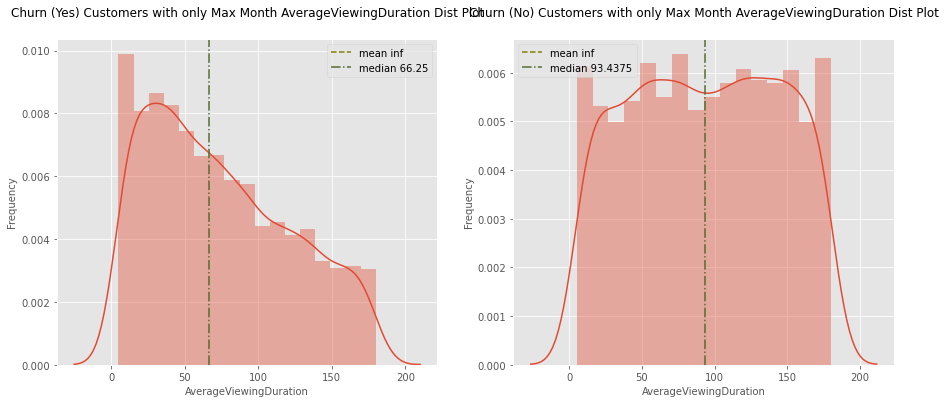

In [49]:
ShowDistPlotForNumericFeatures(Customer_With_Max_AccountAge,'AverageViewingDuration')

Churn Customer data Positive Skewed
Not Churn Customer data Negative Skewed


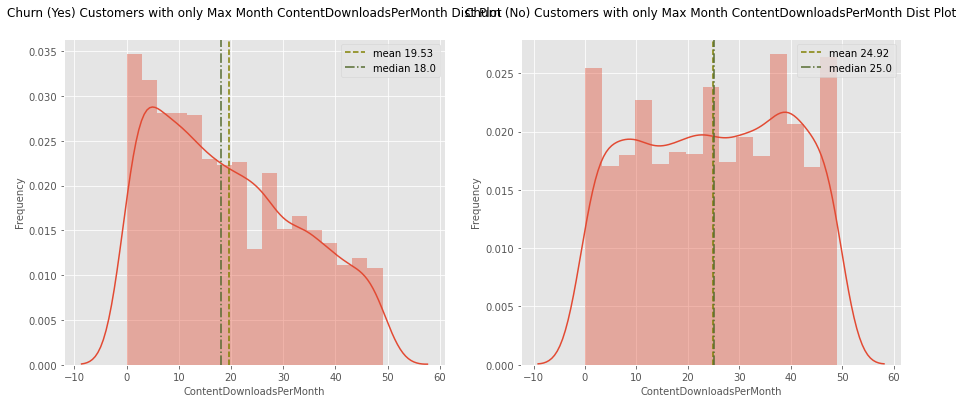

In [50]:
ShowDistPlotForNumericFeatures(Customer_With_Max_AccountAge,'ContentDownloadsPerMonth')

Churn Customer data Positive Skewed
Not Churn Customer data Negative Skewed


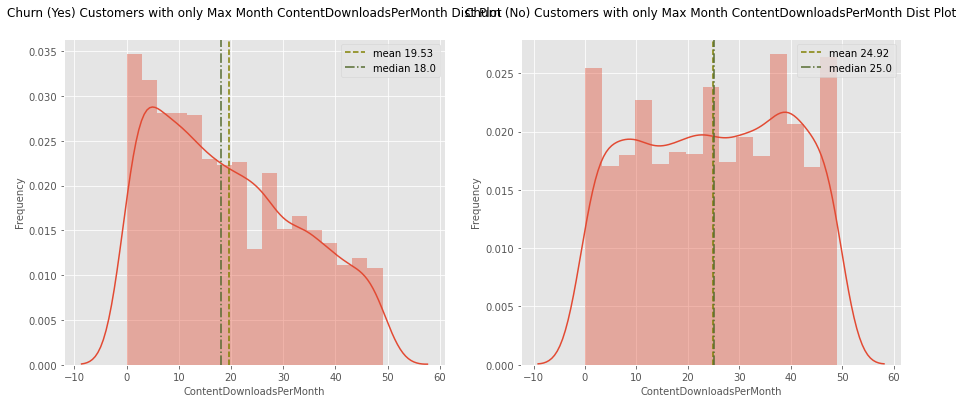

In [51]:
ShowDistPlotForNumericFeatures(Customer_With_Max_AccountAge,'ContentDownloadsPerMonth')

Churn Customer data Positive Skewed
Not Churn Customer data Negative Skewed


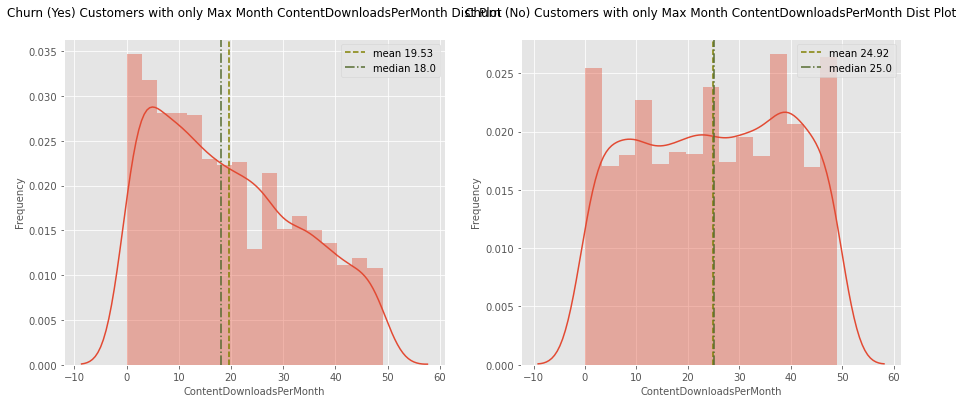

In [52]:
ShowDistPlotForNumericFeatures(Customer_With_Max_AccountAge,'ContentDownloadsPerMonth')

Churn Customer data Negative Skewed
Not Churn Customer data Positive Skewed


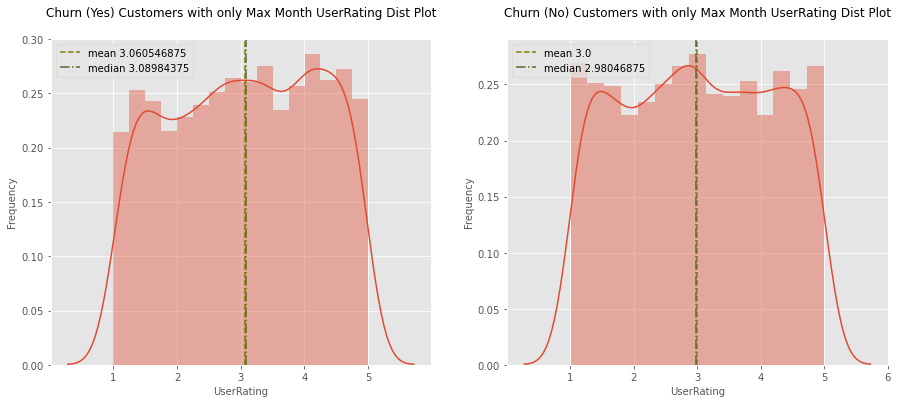

In [53]:
ShowDistPlotForNumericFeatures(Customer_With_Max_AccountAge,'UserRating')

Churn Customer data Positive Skewed
Not Churn Customer data Positive Skewed


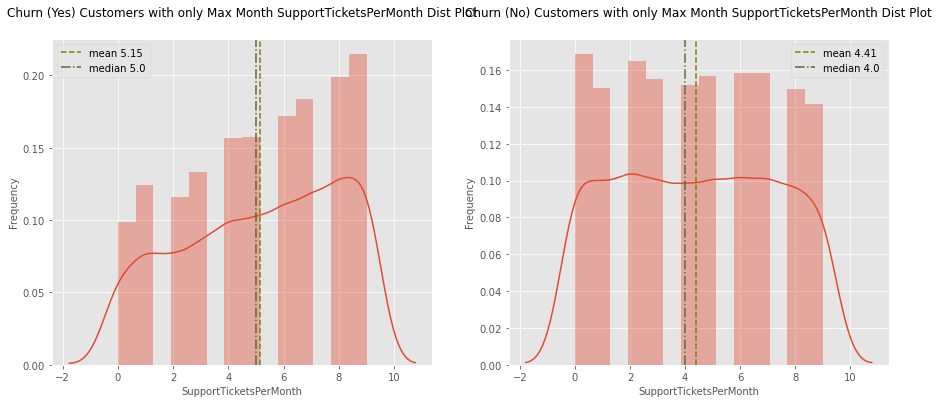

In [54]:
ShowDistPlotForNumericFeatures(Customer_With_Max_AccountAge,'SupportTicketsPerMonth')

Churn Customer data Positive Skewed
Not Churn Customer data Negative Skewed


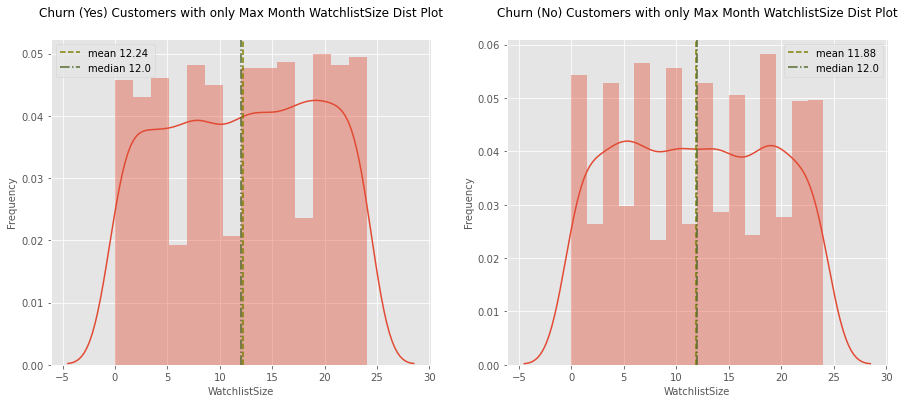

In [55]:
ShowDistPlotForNumericFeatures(Customer_With_Max_AccountAge,'WatchlistSize')

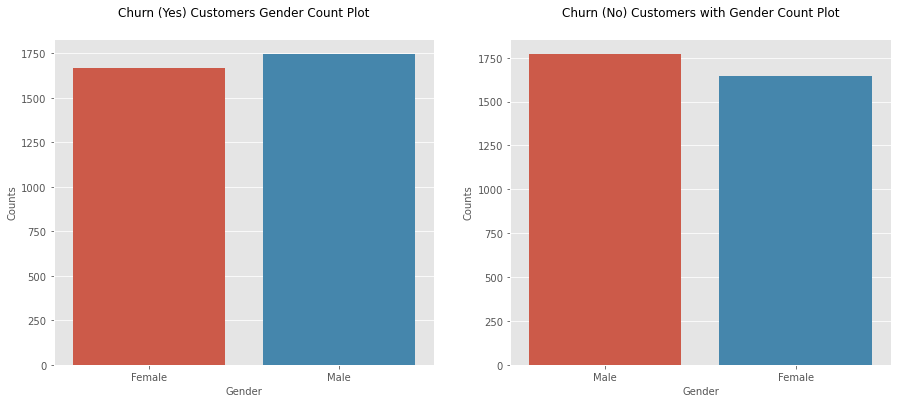

In [56]:
ShowCountPlotForCategoricalFeatures(Customer_With_Max_AccountAge,'Gender')

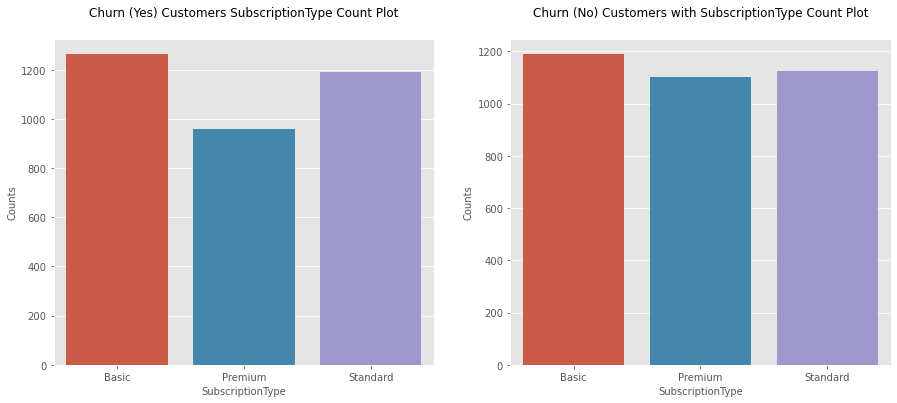

In [57]:
ShowCountPlotForCategoricalFeatures(Customer_With_Max_AccountAge,'SubscriptionType')

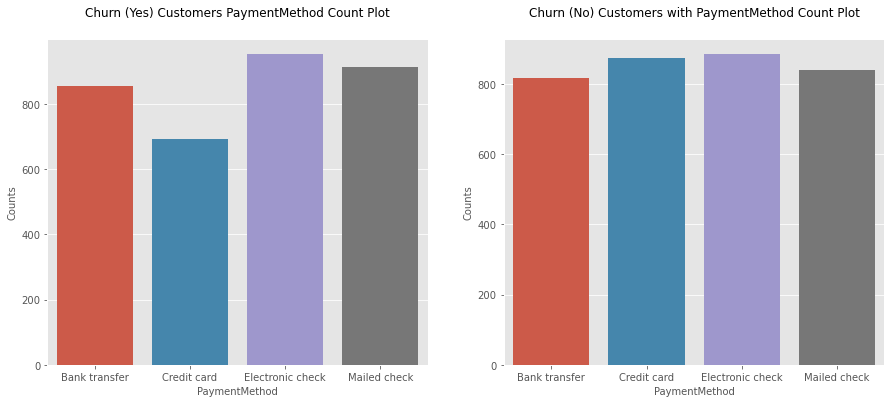

In [58]:
ShowCountPlotForCategoricalFeatures(Customer_With_Max_AccountAge,'PaymentMethod')

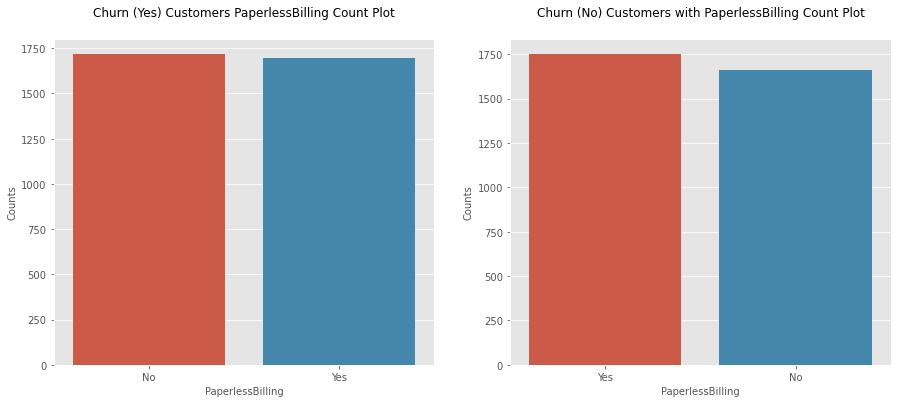

In [59]:
ShowCountPlotForCategoricalFeatures(Customer_With_Max_AccountAge,'PaperlessBilling')

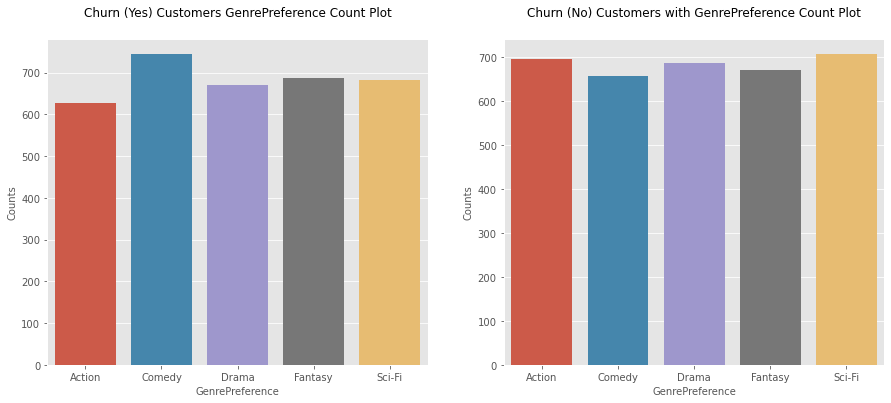

In [60]:
ShowCountPlotForCategoricalFeatures(Customer_With_Max_AccountAge,'GenrePreference')

<details>
<summary><strong>Click to Expand/Collapse - Analyzing Customers with Maximum Account Age</strong></summary>

In this analysis, we are examining the behavior of customers with respect to their maximum account age, specifically focusing on churn (Churn Customers) and non-churn (Not Churn Customers) cases.

<details>
<summary><strong>Monthly Charges</strong></summary>

- **Churn Customers:**
    - Monthly Charges are negatively skewed (Mean < Median). This means that if we randomly pick customers with a minimum account age of 1, they tend to belong to the group that pays around 2.5 - 13 on their first month.

- **Not Churn Customers:**
    - Monthly Charges are symmetrically skewed (Mean == Median). 

</details>

<details>
<summary><strong>Viewing Hours Per Week</strong></summary>

- **Churn Customers:**
    - Viewing Hours Per Week are positively skewed (Mean > Median). If we randomly pick customers with a minimum account age of 1, they belong to the group with a high weekly viewing time.
Shows people are loosing interest more as compared to people having good Hours per week.

- **Not Churn Customers:**
    - Viewing Hours Per Week are symmetrically skewed (Mean == Median). 
</details>

<details>
<summary><strong>Average Viewing Duration</strong></summary>

- **Churn Customers:**
    - Average Viewing Duration is positively skewed (Mean > Median). Customers with a minimum account age of 1 in this group have a high average viewing duration.

- **Not Churn Customers:**
    - Average Viewing Duration are symmetrically skewed (Mean == Median). 
</details>

<details>
<summary><strong>Content Downloads Per Month</strong></summary>

- **Churn Customers:**
    - Content Downloads Per Month is positively skewed (Mean > Median). Customers with a minimum account age of 1 in this group have high content downloads per month.

- **Not Churn Customers:**
    - Content Downloads Per Month is negatively skewed (Mean < Median). Customers with a minimum account age of 1 belong to the group with content downloads per month ranging from 0 to 30 during their early months.
</details>

<details>
<summary><strong>User Rating</strong></summary>

- **Churn Customers:**
    - User Rating is negatively skewed (Mean < Median). Customers with a minimum account age of 1 in this group tend to give lower ratings, and they also exhibit churn behavior. The skewness of user ratings with a minimum account age may provide insights into the reasons behind customer churn.

- **Not Churn Customers:**
    - User Rating is symmetrically skewed (Mean == Median). If we randomly pick customers with a minimum account age of 1, their user ratings are almost normally distributed.
</details>

<details>
<summary><strong>Support Tickets Per Month</strong></summary>

- **Churn Customers:**
    - Support Tickets Per Month is Positively skewed (Mean > Median). Customers with max account age have high rate of Support Tickets Per Month, which can help us identify the churn behavior of customer.

- **Not Churn Customers:**
    - Support Tickets not churn customers shows positive skew mean most if the distribution is lean towards high number shows customers having issues and raise support tickets more.
</details>

<details>
<summary><strong>Watchlist Size</strong></summary>

- **Churn Customers:**
    - Watchlist Size is symmetrically skewed (Mean == Median). If we randomly pick customers with a minimum account age of 1, the distribution is almost normally distributed.

- **Not Churn Customers:**
    - Watchlist Size is symmetrically skewed (Mean == Median). If we randomly pick customers with a minimum account age of 1, the distribution is almost normally distributed.
</details>

<details>
<summary><strong>Gender</strong></summary>

- **Churn Customers:**
    - Both genders show equal behavior.

- **Not Churn Customers:**
    - Both genders show equal behavior.
</details>

<details>
<summary><strong>Subscription Type</strong></summary>

- **Churn Customers:**
    - Most customers with churn behavior goes for Basic, followed by Standard. Fewer customers choose Premium. It may be worth focusing on customers who just joined with Premium and Standard subscription types (same as people who just join our services).

- **Not Churn Customers:**
    - Customers without churn behavior mostly go for Premium, followed by Basic, and lastly Standard.
</details>

<details>
<summary><strong>Payment Method</strong></summary>

- **Churn Customers:**
    - Electronic check is the most popular payment method for customers with churn behavior, followed by mail check. Bank transactions and credit card payments are less common (Same as customers with minimum account age).

- **Not Churn Customers:**
    - Customers without churn behavior prefer Electrinic mail checks, followed by bank transactions, mailed check payments, and credit card.
</details>

<details>
<summary><strong>Paperless Billing</strong></summary>

- **Churn Customers:**
    - Both paperless billing options show equal behavior.

- **Not Churn Customers:**
    - Both paperless billing options show equal behavior.
</details>

<details>
<summary><strong>Genre Preference</strong></summary>

- Genre preference shows equal behavior for both churn and non-churn customers.
</details>

</details>


<mark style="background-color: #add8e6; padding: 10px; display: block;">
<strong>Analyzing Customers with Minimum Account Age Observation:</strong> The account Age month with a value of 1 reveals numerous insights about customer behavior, including churn or non-churn status. This is particularly evident in the following variables:
</mark>

- MonthlyCharges (for churn)
- User Rating 
- SupportTicketsPerMonth


We can say that the extreme values like Account Age (i.e 119) shows significant insigts realted to churn behavior of a customer.

## Feature Selection & Splitting Train into Trained and Validation Dataset
     Steps 
         - Based on correlation we are eleminating features.

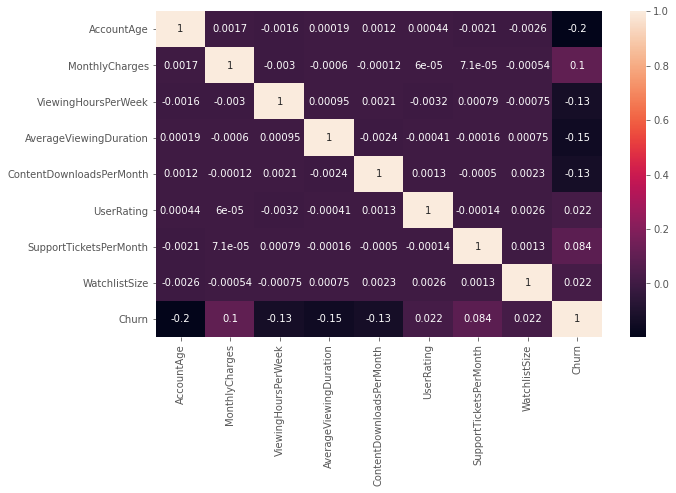

In [61]:
# Correlation of features in the training data

plt.figure(figsize=(10, 6))  
sns.heatmap(train_df.drop('TotalCharges',axis=1).corr(),annot=True)
plt.show()

> **Note:**
> - **Feature Based on Correlaton Matrix:**
>   
    - We droped `Total charges` because it was causing `Multi-colinearity` that is not sutable assumption for linear models.
    - We are first going to use features like `AccountAge`, `UserRating`, `SupportTicketsPerMonths` and `WatchListSize` because its showing better correlation with our `Churn` columns  
    - 


In [62]:
ColumnsToWorkWith = ['AccountAge','MonthlyCharges','UserRating','SupportTicketsPerMonth','WatchlistSize','Churn']
new_train_df = get_balanced_dataset(train_df[ColumnsToWorkWith],'Churn')

In [63]:
new_train_df.sample(5)

,AccountAge,MonthlyCharges,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
58322,6,16.359375,4.972656,1,3,0
79479,7,11.570312,1.301758,0,0,0
23858,13,14.796875,3.460938,4,12,1
74933,65,7.984375,2.855469,4,19,1
46166,34,13.382812,3.091797,2,13,0


In [64]:
new_train_df.shape

(88364, 6)

In [65]:
X,y = new_train_df.drop('Churn',axis=1),new_train_df['Churn']

X_trained, X_val, y_trained, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Experimentation 1
 > Steps
   - Check Base `Logistic Regressor` models perforance with `imbalance dataset`.
   - Check Base `Logistic Regressor` models perforance with `balance dataset using hyperparameter tuning`.

#### Check Base `Logistic Regressor` models perforance with `imbalance dataset`.

In [66]:
pipe =  Pipeline([
        ('StandardScaler',StandardScaler()),
        ('LogisticRegression',LogisticRegression())
])

In [67]:
X_trained.shape, X_val.shape, y_trained.shape, y_val.shape

((59203, 5), (29161, 5), (59203,), (29161,))

In [68]:
pipe = pipe.fit(X_trained,y_trained)

In [69]:
X_trained_pred =  pipe.predict(X_trained)

In [70]:
pd.DataFrame(confusion_matrix(y_trained,X_trained_pred),columns=[['Predicted',''],['Not Churn','Churn']],index=[['Actual',''],['Not Churn','Churn']])

,,Predicted,
,,Not Churn,Churn
Actual,Not Churn,18260,11291
,Churn,10490,19162


In [71]:
f1_score(y_trained,X_trained_pred)

0.637617502703602

<mark style="background-color: #add8e6; padding: 10px; display: block;">
<strong>Base Model with imbalance Data Observation:</strong>
 <ul>
    <li>This Experiment is to show what happen if we work with imbalance dataset</li>
    <li> We can see that when we feed imbalance data with `Majority class (0)` and `Minority class (1)`, Our model predict quite good for `Majority class` but perform worst for `Minority class`.</li>
     <li> We need to balance out dataset based on Churn feature, we use `get_balanced_dataset` function and then feed data again in pipeline.</li>
     <li> 0.003% churn customers are trully classified and 99% are misclassified </li>
     <li> Trained data fl score is  0.0076223 (Underfitting Model)</li>
  </ul>     
</mark>


#### Check Base `Logistic Regressor` models perforance with `balance dataset using hyperparameter tuning`.

In [134]:
steps = [
        ('StandardScaler',StandardScaler()),
        ('LogisticRegression',LogisticRegression())
]

param_grid = {
    'LogisticRegression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'LogisticRegression__penalty': ['l1', 'l2'], 
    'LogisticRegression__solver': ['liblinear'] 
}

pipe =  Pipeline(steps)

f1_scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=f1_scorer)

In [135]:
X_trained.shape, X_val.shape, y_trained.shape, y_val.shape

((59203, 5), (29161, 5), (59203,), (29161,))

In [136]:
grid_search.fit(X_trained,y_trained)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'LogisticRegression__C': 0.1, 'LogisticRegression__penalty': 'l1', 'LogisticRegression__solver': 'liblinear'}
Best Model: Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('LogisticRegression',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])


In [137]:
grid_search.best_score_

0.6323733969760812

In [138]:
model = best_model.fit(X_trained,y_trained)

In [139]:
X_trained_pred = model.predict(X_trained)

In [140]:
confusion_mat = pd.DataFrame(confusion_matrix(y_trained,X_trained_pred),columns=[['Predicted',''],['Not Churn','Churn']],index=[['Actual',''],['Not Churn','Churn']])
confusion_mat

,,Predicted,
,,Not Churn,Churn
Actual,Not Churn,18272,11279
,Churn,10501,19151


In [141]:
f1_score(y_trained,X_trained_pred)

0.6374954229220066

In [142]:
roc_auc_score(y_trained,X_trained_pred)

0.6320897478714694

In [143]:
val_pred = model.predict(X_val)

In [144]:
confusion_mat = pd.DataFrame(confusion_matrix(y_val,val_pred),columns=[['Predicted',''],['Not Churn','Churn']],index=[['Actual',''],['Not Churn','Churn']])
confusion_mat

,,Predicted,
,,Not Churn,Churn
Actual,Not Churn,8971,5660
,Churn,5119,9411


In [145]:
f1_score(y_val,val_pred)

0.635856896726462

In [146]:
roc_auc_score(y_val,val_pred)

0.6304222929723879

<mark style="background-color: #add8e6; padding: 10px; display: block;">
<strong>Hyperparameter Tuned Logistic Regressor with balance Data Observation:</strong>
 <ul>
    <li> We can see that when we feed balance data with `Majority class (0)` and `Minority class (1)`, Our model predict quite good as compared to based model imbalance dataset.</li>
     <li> Model can predict 64.31 % of total churn customers correctly, where as 35 % is predicted incorrectly.</li>
     <li>38.15 % of the times customers who we not churn but model predict churn.</li>
     <li> Model f1 score is 0.63 that is average performace for trained dataset.</li>
     <li>67.16% prediction is correct on validation data about churn customer, where 34.89% times its says a customer is not churn even though customer was churn.</li>
     <li>38.55% of the time model says a customer churn, in real customer was not churn.</li>
     <li> Model f1 score is 0.63 that is average performace for Validation dataset.</li>
  </ul>     
</mark>


### Experimentation 2
 > Steps
   - Check Base `Random Forest` models perforance with `balance dataset`.
   - Check Base `Randome Forest` models perforance with `balance dataset using hyperparameter tuning`.

#### Check Base `Random Forest` models perforance with `balance dataset`.

In [83]:
pipe =  Pipeline([
        ('StandardScaler',StandardScaler()),
        ('RandomForestClassifier',RandomForestClassifier())
])

In [84]:
X_trained.shape, X_val.shape, y_trained.shape, y_val.shape

((59203, 5), (29161, 5), (59203,), (29161,))

In [85]:
pipe = pipe.fit(X_trained,y_trained)

In [86]:
X_trained_pred = pipe.predict(X_trained)

In [87]:
confusion_mat = pd.DataFrame(confusion_matrix(y_trained,X_trained_pred),columns=[['Predicted',''],['Not Churn','Churn']],index=[['Actual',''],['Not Churn','Churn']])
confusion_mat

,,Predicted,
,,Not Churn,Churn
Actual,Not Churn,29551,0
,Churn,0,29652


In [88]:
f1_score(y_trained,X_trained_pred)

1.0

In [89]:
X_val_pred = pipe.predict(X_val)

In [90]:
confusion_mat = pd.DataFrame(confusion_matrix(y_val,X_val_pred),columns=[['Predicted',''],['Not Churn','Churn']],index=[['Actual',''],['Not Churn','Churn']])
confusion_mat

,,Predicted,
,,Not Churn,Churn
Actual,Not Churn,8827,5804
,Churn,5821,8709


In [91]:
f1_score(y_val,X_val_pred)

0.599731432703233

<mark style="background-color: #add8e6; padding: 10px; display: block;">
<strong>Base Rnadom Forest with balance Data Observation:</strong>
 <ul>
    <li> We can see that when we feed balance data with `Majority class (0)` and `Minority class (1)`, Our model predict quite good as compared to based model imbalance dataset.</li>
     <li> Clear Indicate that Random Forest is over fit on train data we can see f1 score is 1 for train and 0.6 for validation data.</li>
  </ul>     
</mark>


#### Check Base `Randome Forest` models perforance with `balance dataset using hyperparameter tuning`.

In [92]:
steps = [
        ('StandardScaler',StandardScaler()),
        ('RandomForestClassifier',RandomForestClassifier())
]

param_grid = {
    'RandomForestClassifier__n_estimators': [15, 25, 50, 75,100],  
    'RandomForestClassifier__max_depth': [5, 6, 7 ,8, 10],  
    'RandomForestClassifier__min_samples_split': [25, 45, 50, 65, 75],
    'RandomForestClassifier__min_samples_leaf': [25, 45, 50, 65, 75]
}

pipe =  Pipeline(steps)

f1_scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=f1_scorer)

In [93]:
X_trained

,AccountAge,MonthlyCharges,UserRating,SupportTicketsPerMonth,WatchlistSize
34241,29,8.898438,1.083008,6,16
55360,59,13.648438,3.423828,8,14
53981,17,13.742188,4.097656,2,24
11835,44,6.328125,2.234375,0,7
53795,101,17.468750,3.621094,5,13
...,...,...,...,...,...
6265,98,15.179688,1.449219,7,1
54886,99,7.949219,4.132812,8,0
76820,56,18.843750,1.346680,8,9
860,15,14.382812,4.933594,1,3


In [94]:
# grid_search.fit(X_trained,y_trained)

# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
# best_score = grid_search.best_score_
# print("Best Hyperparameters:", best_params)
# print("Best Model:", best_model)
# print('Best Score',best_score)

- Best Hyperparameters: {'RandomForestClassifier__max_depth': 10, 'RandomForestClassifier__min_samples_leaf': 75, 'RandomForestClassifier__min_samples_split': 65, 'RandomForestClassifier__n_estimators': 50}
- Best Model: Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('RandomForestClassifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=75,
                                        min_samples_split=65,
                                        n_estimators=50))])
- Best Score 0.6315715599759777

In [95]:
# steps = [
#         ('StandardScaler',StandardScaler()),
#         ('RandomForestClassifier',RandomForestClassifier(
#             max_depth= 8, min_samples_leaf = 50, min_samples_split =  50, n_estimators = 75
#         ))
# ]

# pipe =  Pipeline(steps)

# pipe = pipe.fit(X_trained,y_trained)

In [96]:
X_trained_pred = best_model.predict(X_trained)

In [97]:
confusion_mat = pd.DataFrame(confusion_matrix(y_trained,X_trained_pred),columns=[['Predicted',''],['Not Churn','Churn']],index=[['Actual',''],['Not Churn','Churn']])
confusion_mat

,,Predicted,
,,Not Churn,Churn
Actual,Not Churn,18272,11279
,Churn,10501,19151


In [98]:
f1_score(y_trained,X_trained_pred)

0.6374954229220066

In [99]:
X_val_pred = best_model.predict(X_val)

In [100]:
confusion_mat = pd.DataFrame(confusion_matrix(y_val,X_val_pred),columns=[['Predicted',''],['Not Churn','Churn']],index=[['Actual',''],['Not Churn','Churn']])
confusion_mat

,,Predicted,
,,Not Churn,Churn
Actual,Not Churn,8971,5660
,Churn,5119,9411


In [101]:
f1_score(y_val,X_val_pred)

0.635856896726462

<mark style="background-color: #add8e6; padding: 10px; display: block;">
<strong>Hyper parameter Random Forest with balance Data Observation:</strong>
 <ul>
    <li> We can see that when we feed balance data with `Majority class (0)` and `Minority class (1)`, Our model predict quite good as compared to based model imbalance dataset.</li>
     <li> For trained dataset 66.25% time Random forest correctly classify the Churn customers but 33.74% times Random forest inccorectly classified the churn customers and final f1 score for trained dataset is 65%.</li>
     <li> For validation dataset 60.28% time Random forest correctly classify the Churn customers but 39.71% times Random forest inccorectly classified the churn customers and final f1 score for trained dataset is 64%.</li>
     <li> Random forest performance is better than logistic regressor but not acceptable there are around 30-40 variance that still our model is unable to capture about data.</li>
  </ul>     
</mark>


### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [147]:
steps = [
        ('StandardScaler',StandardScaler()),
        ('RandomForestClassifier',RandomForestClassifier(
            max_depth = 10,
            min_samples_leaf = 75,
            min_samples_split =  65,
            n_estimators = 50
        ))
]
pipe =  Pipeline(steps)

pipe = pipe.fit(X_trained,y_trained)

In [148]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted = pipe.predict(test_df[ColumnsToWorkWith[:-1]])

In [128]:
prediction_df = pd.DataFrame({'CustomerID': test_df['CustomerID'], 'predicted_probability': predicted})

In [129]:
prediction_df.sample(5)

,CustomerID,predicted_probability
36652,CX4IHN1M97,1
53914,NPJD58IZZ1,1
3818,ACW73ZCA4I,0
47103,25B737VVCK,0
22971,61FHOA5MBY,1


In [108]:
prediction_df.shape

(104480, 2)

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [130]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [131]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [132]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [133]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!